## Telecom Churn Case Study

### Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing important libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd,numpy as np

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",300)

In [4]:
# Importing dataset
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Step 2: Inspecting the Dataframe

In [5]:
# Let's check the dimensions of the dataframe
telecom.shape

(99999, 226)

In [6]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
pd.set_option("display.max_seq_items",None)
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7'

In [9]:
##Stripping off white_spaces from the column name(if any)
telecom= telecom.rename(columns= lambda x: x.strip(), inplace=False)

In [10]:
## Incorrect name columns 
last_day_rech_cols = list(telecom.columns[telecom.columns.str.contains('last_day_rch_amt')])
last_day_rech_cols

['last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9']

In [11]:
##Correcting name of 'last_day_rch_amt_*' to 'last_day_rech_amt_*' columns (for months 6,7,8 and 9 respectively)
telecom= telecom.rename(columns= {'last_day_rch_amt_6':'last_day_rech_amt_6', 'last_day_rch_amt_7':'last_day_rech_amt_7',\
                                     'last_day_rch_amt_8':'last_day_rech_amt_8', 'last_day_rch_amt_9':'last_day_rech_amt_9'})
correct_last_day_rech_amt_col = list(telecom.columns[telecom.columns.str.contains('last_day')])
correct_last_day_rech_amt_col

['last_day_rech_amt_6',
 'last_day_rech_amt_7',
 'last_day_rech_amt_8',
 'last_day_rech_amt_9']

In [12]:
# Creating a copy of the data incase it is required later
telecom_churn = telecom.copy()

### High Value Customer:

In churn prediction, we assume that there are three phases of the customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.

As mentioned above, we need to predict churn only for high-value customers.

Defination:

High Value Customer: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [13]:
# total amount of recharge for talktime we dont have that number for data, instead we have average and number of rechanrges
telecom_churn['total_data_rech_amt_6'] = telecom_churn['av_rech_amt_data_6'] * telecom_churn['total_rech_data_6']
telecom_churn['total_data_rech_amt_7'] = telecom_churn['av_rech_amt_data_7'] * telecom_churn['total_rech_data_7']
telecom_churn['total_data_rech_amt_8'] = telecom_churn['av_rech_amt_data_8'] * telecom_churn['total_rech_data_8']
telecom_churn['total_data_rech_amt_9'] = telecom_churn['av_rech_amt_data_9'] * telecom_churn['total_rech_data_9']

In [14]:
# Drop the columns already accounted for 
telecom_churn.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [15]:
# calculating average recharge done by customer in 6th and 7th month i.e for good phase 
avg_total_rech_amt_gd_phase = ( telecom_churn['total_rech_amt_6'].fillna(0) + telecom_churn['total_rech_amt_7'].fillna(0) + 
                               telecom_churn['total_data_rech_amt_6'].fillna(0) + telecom_churn['total_data_rech_amt_7'].fillna(0) ) / 2

In [16]:
# looking 70 percentile of the avg_total_rech_amt_gd_phase
avg_total_rech_amt_gd_phase_filter = np.percentile(avg_total_rech_amt_gd_phase, 70.0)
print(avg_total_rech_amt_gd_phase_filter)

478.0


In [17]:
# high value customer data
telecom_churn =  telecom_churn[avg_total_rech_amt_gd_phase >= avg_total_rech_amt_gd_phase_filter]
telecom_churn.shape

(30001, 222)

#### Observation: 
On filtering the high-value customers, we get about 30K observations. These shall be used for further analysis.

#### Deriving Churn column :

Now tagging the churned customers (churn=1, else 0) based on the 9th month(i.e september) as follows: Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

In [18]:
telecom_churn["churn"] = np.where((telecom_churn["total_ic_mou_9"]==0) & (telecom_churn["total_og_mou_9"]==0) & (telecom_churn["vol_2g_mb_9"]==0) & (telecom_churn["vol_3g_mb_9"]==0), 1, 0)

In [19]:
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/

In [20]:
# Deleting all the attributes corresponding to the churn phase i.e 9 months

churn_phase_9 = [col for col in telecom_churn.columns.to_list() if '_9' in col]
print(churn_phase_9)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rech_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_data_rech_amt_9']


In [21]:
# Deleting the churn phase columns
telecom_churn = telecom_churn.drop(churn_phase_9, axis=1)

In [22]:
# Dropping sep_vbc_3g column
telecom_churn =telecom_churn.drop('sep_vbc_3g', axis=1)

In [23]:
telecom_churn.shape

(30001, 169)

### Step 3: Data Preparation (Data Cleaning and Treatment)¶

In [24]:
# Mising Data Percentage 
telecom_missing_col = telecom_churn.isnull().sum()*100/telecom_churn.shape[0]
telecom_missing_col

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.746642
std_og_t2o_mou               0.746642
loc_ic_t2o_mou               0.746642
last_date_of_month_6         0.000000
last_date_of_month_7         0.089997
last_date_of_month_8         0.549982
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_og_mou_6                1.816606
roam_og_mou_7                1.789940
roam_og_mou_8                3.913203
loc_og_t2t_mou_6             1.816606
loc_og_t2t_mou_7             1.789940
loc_og_t2t_mou_8             3.913203
loc_og_t2m_m

In [25]:
# Select columns with more than 40% missing values
missing_val_col =telecom_missing_col[telecom_missing_col > 40].index.tolist()
missing_val_col

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'total_data_rech_amt_6',
 'total_data_rech_amt_7',
 'total_data_rech_amt_8']

In [26]:
# Drop missing_val_col > 40% missing values
telecom_churn.drop(missing_val_col, axis=1, inplace=True)
telecom_churn.shape

(30001, 142)

In [27]:
telecom_churn.isnull().sum()*100/telecom_churn.shape[0]

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          0.746642
std_og_t2o_mou          0.746642
loc_ic_t2o_mou          0.746642
last_date_of_month_6    0.000000
last_date_of_month_7    0.089997
last_date_of_month_8    0.549982
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
onnet_mou_6             1.816606
onnet_mou_7             1.789940
onnet_mou_8             3.913203
offnet_mou_6            1.816606
offnet_mou_7            1.789940
offnet_mou_8            3.913203
roam_ic_mou_6           1.816606
roam_ic_mou_7           1.789940
roam_ic_mou_8           3.913203
roam_og_mou_6           1.816606
roam_og_mou_7           1.789940
roam_og_mou_8           3.913203
loc_og_t2t_mou_6        1.816606
loc_og_t2t_mou_7        1.789940
loc_og_t2t_mou_8        3.913203
loc_og_t2m_mou_6        1.816606
loc_og_t2m_mou_7        1.789940
loc_og_t2m_mou_8        3.913203
loc_og_t2f_mou_6        1.816606
loc_og_t2f

In [28]:
 # remaining colums have less than 5% of the data missing we can drop the rows with the missing values.
for col in telecom_churn.columns:
    telecom_churn = telecom_churn[~telecom_churn[col].isna()]
telecom_churn.isnull().sum()*100/telecom_churn.shape[0]

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7        0.0
loc_og_t2c_mou_8        0.0
loc_og_mou_6        

In [29]:
# we eliminating date columns as they won't be useful for our analysis
date_columns = list(telecom_churn.columns[telecom_churn.columns.str.contains("date")])
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [30]:
# Dropping the date columns
telecom_churn.drop(date_columns, axis=1, inplace=True)
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.00,0.00,0.00,0.0,0.00

In [31]:
# Check columns for only 1 unique/single value
unique_val = []

for col in telecom_churn.columns:
    if telecom_churn[col].nunique() == 1:
        unique_val.append(col)
unique_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [32]:
# Dropping unique value columns
telecom_churn.drop(unique_val, axis=1, inplace=True)
telecom_churn.shape

(28163, 126)

In [33]:
##Creating  a new column tenure_year to store the number of years the customer has been on network T
telecom_churn['tenure_yr'] = round(telecom_churn['aon']/365, 1)

print(telecom_churn.tenure_yr.value_counts())
print("Min:",telecom_churn.tenure_yr.min())
print("Max:",telecom_churn.tenure_yr.max())

1.3     1281
0.8      974
0.6      966
1.0      939
1.4      911
0.9      910
0.7      839
1.2      764
1.1      700
1.7      640
2.0      639
1.8      629
1.5      609
1.9      574
0.5      562
2.2      488
1.6      484
2.1      476
2.3      474
10.0     469
2.4      453
2.6      431
3.0      396
2.8      396
2.9      383
2.5      376
2.7      349
6.5      333
3.1      328
3.3      319
3.2      299
3.4      288
3.6      287
8.5      281
3.5      281
3.7      278
3.8      270
4.2      239
3.9      236
4.0      229
4.6      225
6.6      213
7.1      207
6.9      207
4.7      197
4.3      197
7.0      195
6.8      194
7.6      189
4.1      182
7.5      177
7.9      171
6.4      167
4.9      167
7.8      164
4.4      160
6.7      160
7.2      157
5.4      155
7.4      154
8.0      153
6.3      151
6.2      146
4.5      141
5.0      138
8.8      138
4.8      137
7.7      136
6.1      134
8.1      133
5.5      133
8.2      127
5.3      127
8.3      124
8.4      124
5.6      121
7.3      119

In [34]:
##Creating bins
bins_yr = [0,1,2,3,5,12]
label_aon= ['0_1_yr','1_2_yr','2_3_yr','3_5_yr','5_12_yr']
telecom_churn['tenure'] = pd.cut(telecom_churn['tenure_yr'], bins= bins_yr, labels= label_aon)

##Dropping 'tenure_yr' and 'aon' column as we have already created bins in 'tenure' column
telecom_churn.drop(['tenure_yr','aon'] , axis=1, inplace= True)

telecom_churn.tenure.value_counts()

1_2_yr     7231
5_12_yr    6922
0_1_yr     5190
3_5_yr     4598
2_3_yr     4222
Name: tenure, dtype: int64

In [35]:
# Dropping the column 'mobile_number' as it will not useful in analysis 
telecom_churn.drop("mobile_number", axis=1, inplace=True)
telecom_churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,tenure
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,1,2_3_yr
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0,0_1_yr
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,1_2_yr
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0

In [36]:
# Creating new feature and drop the redundant columns
col_6_7 = [col[:-2] for col in telecom_churn.columns if '6' in col or '7' in col]
for col in set(col_6_7):
    telecom_churn[f'gd_ph_{col}'] = (  telecom_churn[f'{col}_6'] +  telecom_churn[f'{col}_7'] ) / 2
    telecom_churn.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
telecom_churn.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,tenure,gd_ph_std_og_t2t_mou,gd_ph_max_rech_amt,gd_ph_std_ic_t2m_mou,gd_ph_monthly_2g,gd_ph_og_others,gd_ph_vol_2g_mb,gd_ph_sachet_2g,gd_ph_loc_ic_t2t_mou,gd_ph_sachet_3g,gd_ph_roam_og_mou,gd_ph_spl_og_mou,gd_ph_last_day_rech_amt,gd_ph_loc_og_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_std_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_std_ic_t2f_mou,gd_ph_onnet_mou,gd_ph_loc_og_t2t_mou,gd_ph_vol_3g_mb,gd_ph_loc_og_mou,gd_ph_ic_others,gd_ph_std_og_mou,gd_ph_std_og_t2f_mou,gd_ph_isd_og_mou,gd_ph_spl_ic_mou,gd_ph_loc_ic_mou,gd_ph_total_og_mou,gd_ph_total_rech_num,gd_ph_monthly_3g,gd_ph_total_ic_mou,gd_ph_std_ic_mou,gd_ph_total_rech_amt,gd_ph_roam_ic_mou,gd_ph_offnet_mou,gd_ph_arpu,gd_ph_std_ic_t2t_mou,gd_ph_loc_ic_t2m_mou,gd_ph_isd_ic_mou
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,57.74,19.38,18.74,1,2_3_yr,13.795,1185.0,109.215,0.0,0.0,0.000,0.0,45.200,0.0,18.165,2.25,0.0,378.005,126.810,0.0,40.825,58.635,43.215,56.26,41.385,0.000,478.035,15.465,68.000,13.37,0.090,0.105,391.555,548.385,5.0,0.0,592.250,176.810,1185.0,24.86,510.295,1209.5150,24.360,219.525,8.295
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,21.03,910.65,122.16,0,0_1_yr,124.995,122.0,13.255,0.5,0.0,178.000,0.5,16.840,0.0,0.000,0.00,25.0,75.770,0.000,0.0,11.865,0.000,0.000,382.36,257.360,375.475,333.135,0.000,136.870,0.00,0.000,0.000,52.630,470.010,20.0,0.0,66.175,13.545,519.0,0.00,87.645,435.4720,0.290,35.780,0.000
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0,1_2_yr,111.935,50.0,52.960,0.0,0.0,0.000,0.0,6.335,0.0,0.000,0.00,25.0,89.870,3.725,0.0,737.050,0.375,0.000,117.26,5.320,0.000,95.565,0.000,848.990,0.00,0.000,0.000,106.505,944.565,24.0,0.0,169.490,62.985,640.0,0.00,827.305,556.1030,10.020,96.430,0.000
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,0.01,1009.92,0,0,1,1,40.45,51.86,0.00,0,1_2_yr,0.000,89.5,8.660,0.0,0.0,0.240,0.0,40.875,0.0,0.000,0.05,89.5,82.975,0.000,0.0,4.355,0.000,0.000,49.81,49.810,299.545,132.795,2.675,4.355,0.00,0.005,0.000,145.520,137.210,4.0,1.0,171.235,8.915,227.0,0.00,87.385,134.1235,0.255,104.635,14.115
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.56,2.45,37.93,0.16,40.54,0.05,0.86,0.13,1.04,41.79,0.0,0.00,0.20,1,455,455,455,7.97,7701.01,0,0,1,0,358.10,2706.83,1714.67,0,3_5_yr,0.000,753.5,2.365,0.0,0.0,72.405,0.0,1.155,2.0,0.000,0.00,126.0,0.000,1.020,0.0,0.000,0.000,0.595,0.00,0.000,5832.275,0.000,0.940,0.000,0.00,0.000,0.000,2.180,0.000,10.5,4.5,7.540,4.420,1932.0,0.00,0.000,1669.9265,1.455,0.000,0.000


In [37]:
telecom_churn.shape

(28163, 85)

### Outlier Treatment:

In [38]:
##Continuous features
cont_cols= [i for i in telecom_churn.columns if i not in ['mobile_number', 'churn', 'tenure']]
cont_cols

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rech_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'gd_ph_std_og_t2t_mou',
 'gd_ph_max_rech_amt',
 'gd_ph_std_ic_t2m_mou',
 'gd_ph_monthly_2g',
 'gd_ph_og_others',
 'gd_ph_vol_2g_mb',
 'gd_ph_sachet_2g',
 'gd_ph_loc_ic_t2t_mou',
 'gd_ph_sachet_3g',
 'gd_ph_roam_o

In [39]:
telecom_churn.describe(percentiles= [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,gd_ph_std_og_t2t_mou,gd_ph_max_rech_amt,gd_ph_std_ic_t2m_mou,gd_ph_monthly_2g,gd_ph_og_others,gd_ph_vol_2g_mb,gd_ph_sachet_2g,gd_ph_loc_ic_t2t_mou,gd_ph_sachet_3g,gd_ph_roam_og_mou,gd_ph_spl_og_mou,gd_ph_last_day_rech_amt,gd_ph_loc_og_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_std_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_std_ic_t2f_mou,gd_ph_onnet_mou,gd_ph_loc_og_t2t_mou,gd_ph_vol_3g_mb,gd_ph_loc_og_mou,gd_ph_ic_others,gd_ph_std_og_mou,gd_ph_std_og_t2f_mou,gd_ph_isd_og_mou,gd_ph_spl_ic_mou,gd_ph_loc_ic_mou,gd_ph_total_og_mou,gd_ph_total_rech_num,gd_ph_monthly_3g,gd_ph_total_ic_mou,gd_ph_std_ic_mou,gd_ph_total_rech_amt,gd_ph_roam_ic_mou,gd_ph_offnet_mou,gd_ph_arpu,gd_ph_std_ic_t2t_mou,gd_ph_loc_ic_t2m_mou,gd_ph_isd_ic_mou
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,528.992500,246.288657,351.089623,13.145865,20.926258,82.376724,159.312714,6.147877,1.789363,247.845569,155.918660,164.553111,1.646062,322.121339,1.989213,6.889342,0.061151,578.914527,66.142275,154.295671,15.191563,235.639315,14.625113,29.440255,2.692254,46.761176,295.165236,0.027889,11.437856,1.291328,10.435323,610.754607,164.597131,94.779640,109.831129,349.209687,0.160210,1.100771,0.209459,0.208287,173.745705,180.655113,157.965702,0.054611,173.644175,167.748198,30.886979,0.183397,0.359434,127.717157,1.154618,68.446871,0.217200,23.757457,6.610121,98.522885,168.146426,16.277503,1.766261,187.079217,6.572665,2.835280,271.207259,88.289263,344.784010,263.016895,1.371220,362.567597,1.840391,2.047679,0.041413,241.031533,634.610425,12.026489,0.213773,303.171601,49.261396,668.439602,14.632102,384.886852,567.163074,15.535415,156.297192,11.458002
std,500.479643,465.372774,482.498518,76.125433,107.722393,233.412303,235.001352,19.904718,7.390599,367.353912,404.045802,413.804895,11.126142,615.275135,45.888765,20.813297,3.421503,699.739896,163.115483,218.559404,44.457495,313.175366,73.017056,106.285136,20.476161,142.430462,366.056859,0.113430,72.276371,13.164084,9.288002,610.396698,169.014286,141.789453,317.809110,886.448371,0.413067,2.573361,0.619138,1.116503,424.621028,447.089836,415.879933,0.227223,388.535547,148.011960,94.977327,0.392058,2.533710,304.044111,2.435548,159.772390,0.940707,94.459260,17.610173,108.064480,233.124752,45.347936,6.536779,397.127914,21.329876,18.312495,443.021451,226.914673,790.524029,361.575126

In [40]:
# Removing outliersin between 1 and 99.9 percentiles
for col in cont_cols: 
    q1 = telecom_churn[col].quantile(0.010)
    q3 = telecom_churn[col].quantile(0.999)
    iqr = q3-q1
    range_lower  = q1-1.5*iqr
    range_upper = q3+1.5*iqr
    # Assigning the filtered dataset into data
    tele_churn_data_1 = telecom_churn.loc[(telecom_churn[col] > range_lower) & (telecom_churn[col] < range_upper)]
 

In [41]:
tele_churn_data_1.shape

(28160, 85)

### Step 4: EDA

### Univariant Analysis:

#### Deriving new column decrease_rech_num_actionphase

Churn rate on the basis whether the customer decreased consumers number of recharge in action month. This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase

In [42]:
# Difference total_rech_num_8 and gd_ph_total_rech_num
tele_churn_data_1['diff_rech_num'] =tele_churn_data_1['total_rech_num_8']- tele_churn_data_1['gd_ph_total_rech_num'] 

In [43]:
# Checking if rech_num has decreased in action phase
tele_churn_data_1['decrease_rech_num_actionphase'] = np.where((tele_churn_data_1['diff_rech_num'] < 0), 1, 0)

In [44]:
tele_churn_data_1.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,tenure,gd_ph_std_og_t2t_mou,gd_ph_max_rech_amt,gd_ph_std_ic_t2m_mou,gd_ph_monthly_2g,gd_ph_og_others,gd_ph_vol_2g_mb,gd_ph_sachet_2g,gd_ph_loc_ic_t2t_mou,gd_ph_sachet_3g,gd_ph_roam_og_mou,gd_ph_spl_og_mou,gd_ph_last_day_rech_amt,gd_ph_loc_og_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_std_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_std_ic_t2f_mou,gd_ph_onnet_mou,gd_ph_loc_og_t2t_mou,gd_ph_vol_3g_mb,gd_ph_loc_og_mou,gd_ph_ic_others,gd_ph_std_og_mou,gd_ph_std_og_t2f_mou,gd_ph_isd_og_mou,gd_ph_spl_ic_mou,gd_ph_loc_ic_mou,gd_ph_total_og_mou,gd_ph_total_rech_num,gd_ph_monthly_3g,gd_ph_total_ic_mou,gd_ph_std_ic_mou,gd_ph_total_rech_amt,gd_ph_roam_ic_mou,gd_ph_offnet_mou,gd_ph_arpu,gd_ph_std_ic_t2t_mou,gd_ph_loc_ic_t2m_mou,gd_ph_isd_ic_mou,diff_rech_num,decrease_rech_num_actionphase
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,57.74,19.38,18.74,1,2_3_yr,13.795,1185.0,109.215,0.0,0.0,0.000,0.0,45.200,0.0,18.165,2.25,0.0,378.005,126.810,0.0,40.825,58.635,43.215,56.26,41.385,0.000,478.035,15.465,68.000,13.37,0.090,0.105,391.555,548.385,5.0,0.0,592.250,176.810,1185.0,24.86,510.295,1209.5150,24.360,219.525,8.295,2.0,0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,21.03,910.65,122.16,0,0_1_yr,124.995,122.0,13.255,0.5,0.0,178.000,0.5,16.840,0.0,0.000,0.00,25.0,75.770,0.000,0.0,11.865,0.000,0.000,382.36,257.360,375.475,333.135,0.000,136.870,0.00,0.000,0.000,52.630,470.010,20.0,0.0,66.175,13.545,519.0,0.00,87.645,435.4720,0.290,35.780,0.000,-6.0,1
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0,1_2_yr,111.935,50.0,52.960,0.0,0.0,0.000,0.0,6.335,0.0,0.000,0.00,25.0,89.870,3.725,0.0,737.050,0.375,0.000,117.26,5.320,0.000,95.565,0.000,848.990,0.00,0.000,0.000,106.505,944.565,24.0,0.0,169.490,62.985,640.0,0.00,827.305,556.1030,10.020,96.430,0.000,3.0,0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,0.01,1009.92,0,0,1,1,40.45,51.86,0.00,0,1_2_yr,0.000,89.5,8.660,0.0,0.0,0.240,0.0,40.875,0.0,0.000,0.05,89.5,82.975,0.000,0.0,4.355,0.000,0.000,49.81,49.810,299.545,132.795,2.675,4.355,0.00,0.005,0.000,145.520,137.210,4.0,1.0,171.235,8.915,227.0,0.00,87.385,134.1235,0.255,104.635,14.115,0.0,0
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.56,2.45,37.93,0.16,40.54,0.05,0.86,0.13,1.04,41.79,0.0,0.00,0.20,1,455,455,455,7.97,7701.01,0,0,1,0,358.10,2706.83,1714.67,0,3_5_yr,0.000,753.5,2.365,0.0,0.0,72.405,0.0,1.155,2.0,0.000,0.00,126.0,0.000,1.020,0.0,0.000,0.000,0.595,0.00,0.000,5832.275,0.000,0.940,0.000,0.00,0.000,0.000,2.180,0.000,10.5,4.5,7.540,4.420,1932.0,0.00,0.000,1669.9265,1.455,0.000,0.000,-9.5,1


In [45]:
# Converting churn column to int in order to do aggfunc in the pivot table
tele_churn_data_1['churn'] = tele_churn_data_1['churn'].astype('int64')

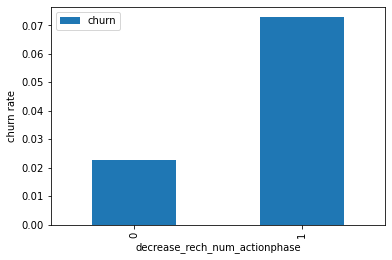

In [46]:
tele_churn_data_1.pivot_table(values='churn', index='decrease_rech_num_actionphase', aggfunc="mean").plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Observation:
The churn rate is more for the customers, whose number of recharge in the action phase is lesser than the  in good phase.

#### Deriving new column decrease_vbc_action for 3G

This column indicates whether the volume based cost (VBC)of the customer has decreased in the action phase than the good phase.

In [47]:
# VBC in action phase
tele_churn_data_1['gd_ph_vbc_3g'] = (tele_churn_data_1['jun_vbc_3g'] + tele_churn_data_1['jul_vbc_3g'])/2

In [48]:
# Difference of good and action phase VBC
tele_churn_data_1['diff_vbc'] = tele_churn_data_1['aug_vbc_3g']-tele_churn_data_1['gd_ph_vbc_3g'] 

In [49]:
# Churn rate on the basis whether the customer decreased her/his volume based cost(vbc) in action month
tele_churn_data_1['decrease_vbc_actionphase'] = np.where(tele_churn_data_1['diff_vbc'] < 0 , 1, 0)

In [50]:
tele_churn_data_1.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,tenure,gd_ph_std_og_t2t_mou,gd_ph_max_rech_amt,gd_ph_std_ic_t2m_mou,gd_ph_monthly_2g,gd_ph_og_others,gd_ph_vol_2g_mb,gd_ph_sachet_2g,gd_ph_loc_ic_t2t_mou,gd_ph_sachet_3g,gd_ph_roam_og_mou,gd_ph_spl_og_mou,gd_ph_last_day_rech_amt,gd_ph_loc_og_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_std_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_std_ic_t2f_mou,gd_ph_onnet_mou,gd_ph_loc_og_t2t_mou,gd_ph_vol_3g_mb,gd_ph_loc_og_mou,gd_ph_ic_others,gd_ph_std_og_mou,gd_ph_std_og_t2f_mou,gd_ph_isd_og_mou,gd_ph_spl_ic_mou,gd_ph_loc_ic_mou,gd_ph_total_og_mou,gd_ph_total_rech_num,gd_ph_monthly_3g,gd_ph_total_ic_mou,gd_ph_std_ic_mou,gd_ph_total_rech_amt,gd_ph_roam_ic_mou,gd_ph_offnet_mou,gd_ph_arpu,gd_ph_std_ic_t2t_mou,gd_ph_loc_ic_t2m_mou,gd_ph_isd_ic_mou,diff_rech_num,decrease_rech_num_actionphase,gd_ph_vbc_3g,diff_vbc,decrease_vbc_actionphase
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,57.74,19.38,18.74,1,2_3_yr,13.795,1185.0,109.215,0.0,0.0,0.000,0.0,45.200,0.0,18.165,2.25,0.0,378.005,126.810,0.0,40.825,58.635,43.215,56.26,41.385,0.000,478.035,15.465,68.000,13.37,0.090,0.105,391.555,548.385,5.0,0.0,592.250,176.810,1185.0,24.86,510.295,1209.5150,24.360,219.525,8.295,2.0,0,19.060,38.680,0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,21.03,910.65,122.16,0,0_1_yr,124.995,122.0,13.255,0.5,0.0,178.000,0.5,16.840,0.0,0.000,0.00,25.0,75.770,0.000,0.0,11.865,0.000,0.000,382.36,257.360,375.475,333.135,0.000,136.870,0.00,0.000,0.000,52.630,470.010,20.0,0.0,66.175,13.545,519.0,0.00,87.645,435.4720,0.290,35.780,0.000,-6.0,1,516.405,-495.375,1
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0,1_2_yr,111.935,50.0,52.960,0.0,0.0,0.000,0.0,6.335,0.0,0.000,0.00,25.0,89.870,3.725,0.0,737.050,0.375,0.000,117.26,5.320,0.000,95.565,0.000,848.990,0.00,0.000,0.000,106.505,944.565,24.0,0.0,169.490,62.985,640.0,0.00,827.305,556.1030,10.020,96.430,0.000,3.0,0,0.000,0.000,0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,0.01,1009.92,0,0,1,1,40.45,51.86,0.00,0,1_2_yr,0.000,89.5,8.660,0.0,0.0,0.240,0.0,40.875,0.0,0.000,0.05,89.5,82.975,0.000,0.0,4.355,0.000,0.000,49.81,49.810,299.545,132.795,2.675,4.355,0.00,0.005,0.000,145.520,137.210,4.0,1.0,171.235,8.915,227.0,0.00,87.385,134.1235,0.255,104.635,14.115,0.0,0,25.930,14.520,0
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.56,2.45,37.93,0.16,40.54,0.05,0.86,0.13,1.04,41.79,0.0,0.00,0.20,1,455,455,455,7.97,7701.01,0,0,1,0,358.10,2706.83,1714.67,0,3_5_yr,0.000,753.5,2.365,0.0,0.0,72.405,0.0,1.155,2.0,0.000,0.00,126.0,0.000,1.020,0.0,0.000,0.000,0.595,0.00,0.000,5832.275,0.000,0.940,0.000,0.00,0.000,0.000,2.180,0.000,10.5,4.5,7.540,4.420,1932.0,0.00,0.000,1669.9265,1.455,0.000,0.000,-9.5,1,2210.750,-1852.650,1


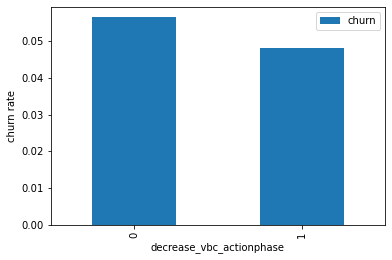

In [51]:
tele_churn_data_1.pivot_table(values='churn', index='decrease_vbc_actionphase', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Observation:
Churn rate is more for the customer whos volume based cost for 3G dropped in action phase. 

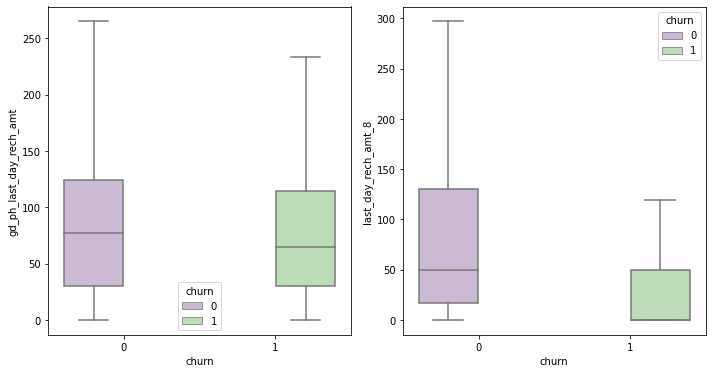

In [52]:
# Plotting boxplots for 'last_day_rech_amt' 
fig=plt.subplots(figsize=(10,10))

for i,feature in enumerate(["gd_ph_last_day_rech_amt", "last_day_rech_amt_8"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 4.0)
    sns.boxplot(y = feature, x = 'churn', data = tele_churn_data_1, hue="churn", showfliers= False, palette=("PRGn"))
    plt.tight_layout()

#### Observation: 
Noticeable drop in the last day recharge amount in the 8th month (action phase) for churned customers.

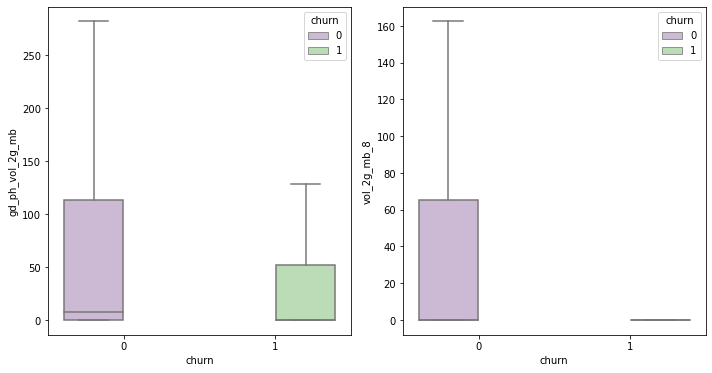

In [53]:
# Plotting volume of data usage: 
fig=plt.subplots(figsize=(10,10))

# Plotting volume of 2G data usage features:
for i,feature in enumerate(["gd_ph_vol_2g_mb", "vol_2g_mb_8"]):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(hspace = 4.0)
    sns.boxplot(y = feature, x = 'churn', data = tele_churn_data_1, hue="churn", showfliers= False, palette=("PRGn"))
    plt.tight_layout()

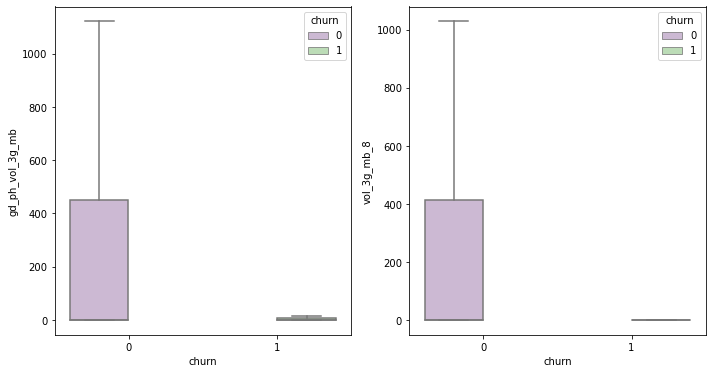

In [54]:
# Plotting volume of 3G data usage features  
fig=plt.subplots(figsize=(10,10))
for i,feature in enumerate(["gd_ph_vol_3g_mb", "vol_3g_mb_8"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 4.0)
    sns.boxplot(y = feature, x = 'churn', data = tele_churn_data_1, hue="churn", showfliers= False, palette=("PRGn"))
    plt.tight_layout()

Observations:     
i. Drop in volume of 2G and 3G data usage substantiallyin the 8th month i.e action phase for churned customers.       
ii. Usage of 3G data is comparatively lesser than that of 2G data, though the drop seems to follow similar pattern.

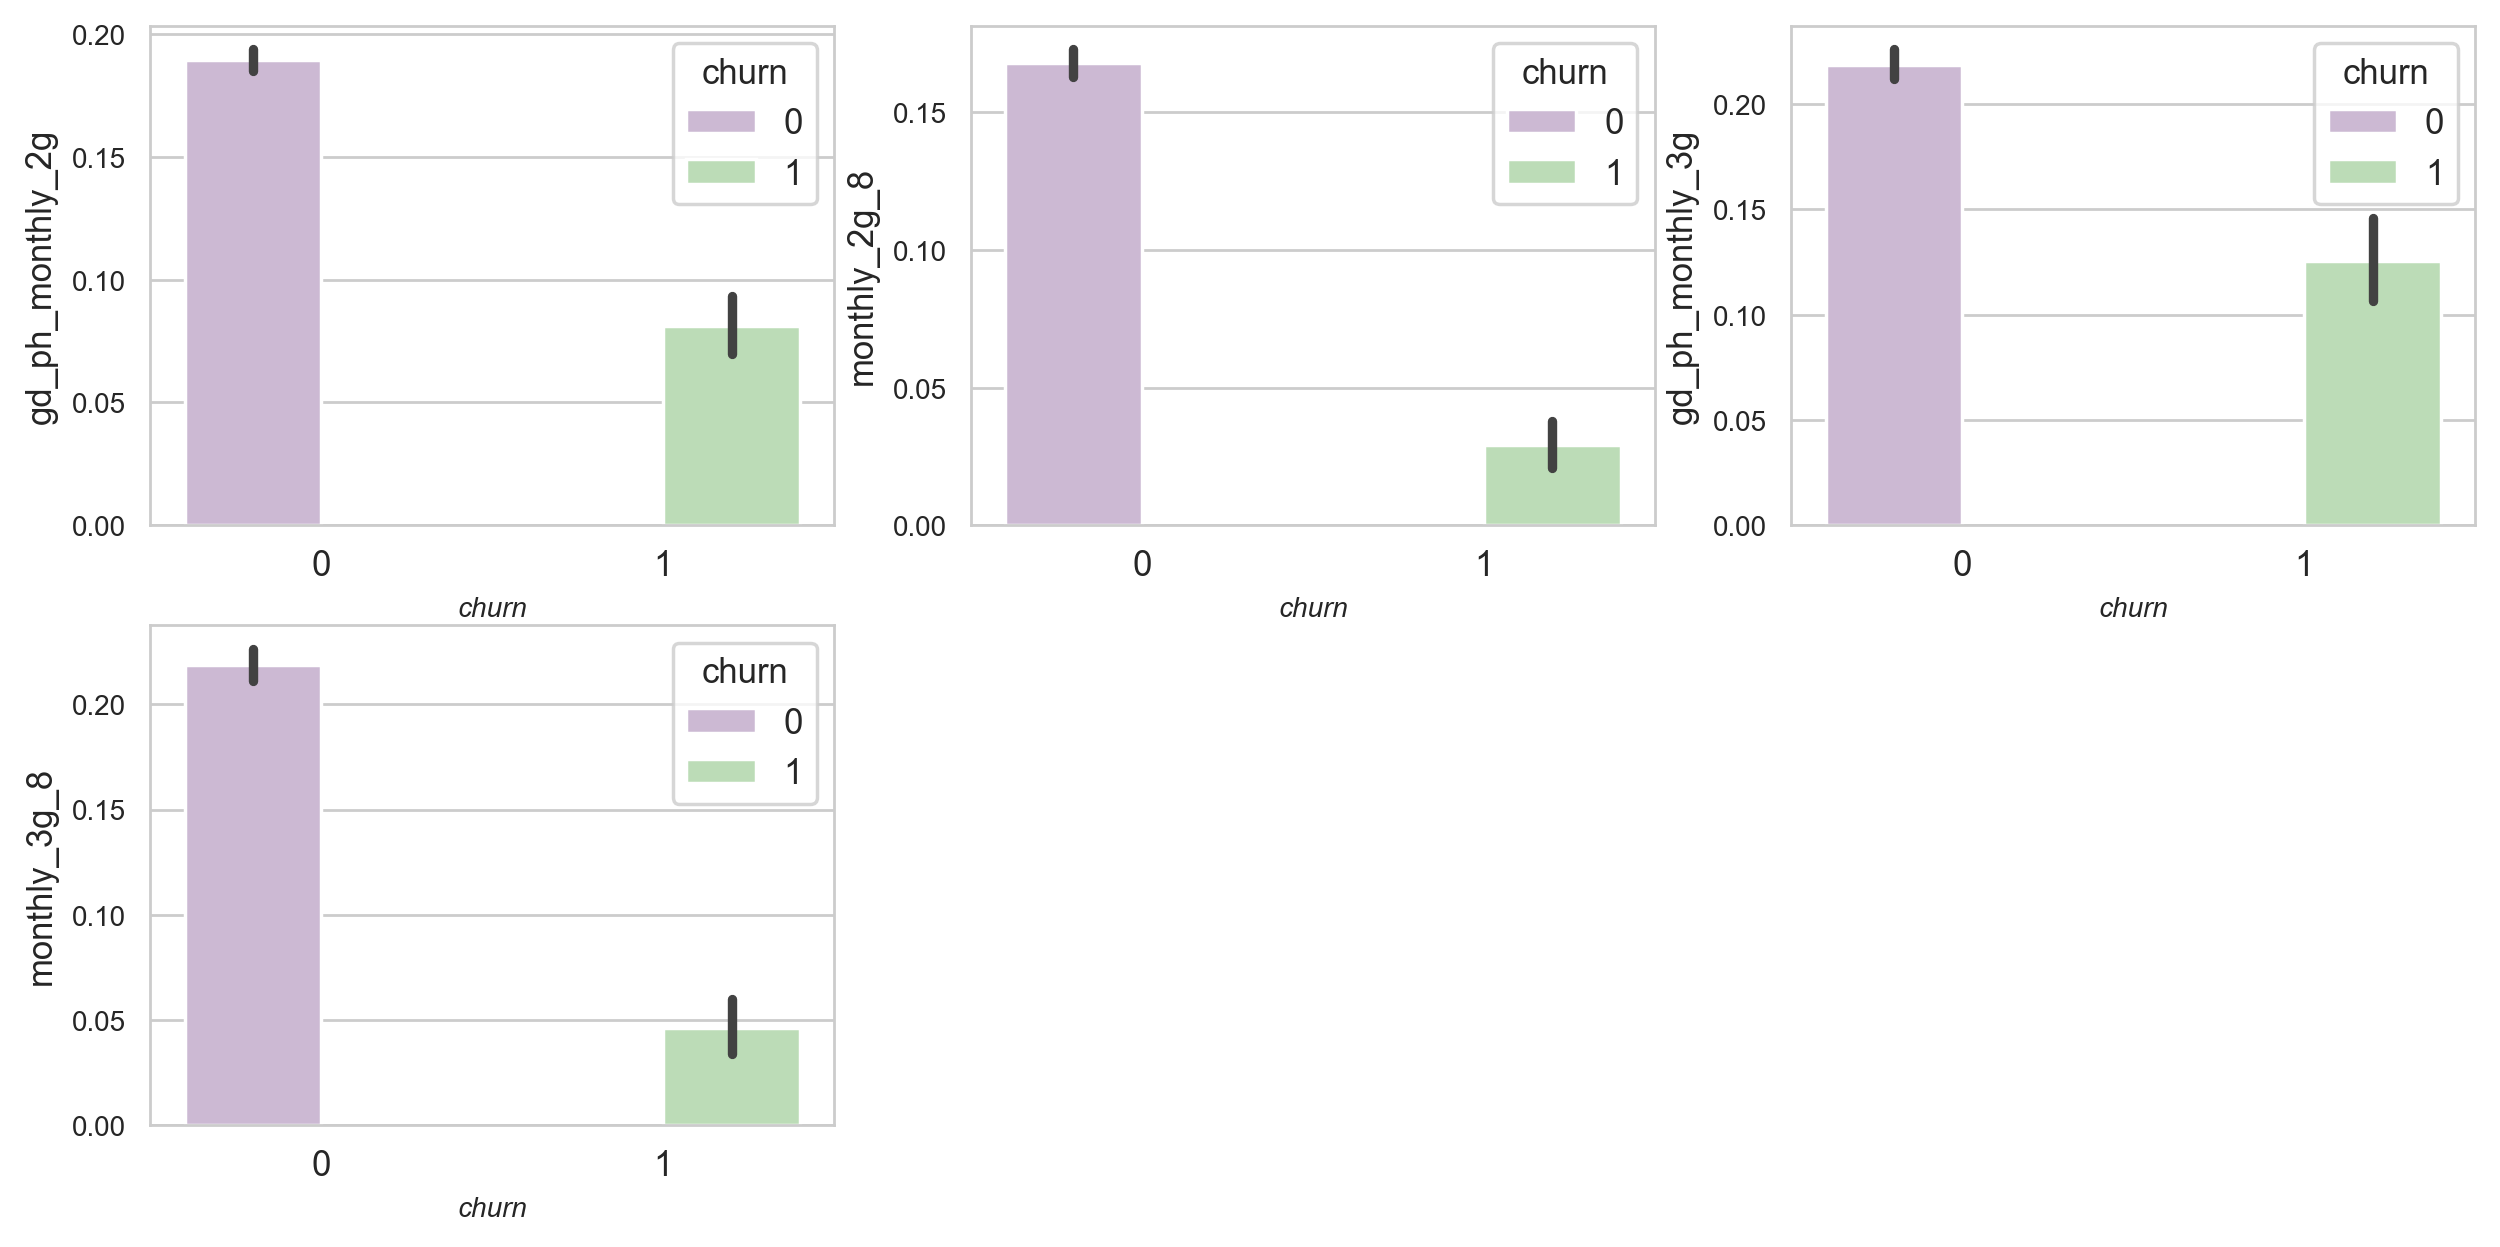

In [55]:
# Barplots for 'monthly_2g' and 'monthly_3g' usage check
plt.figure(figsize=(12,9),dpi=250)
sns.set_style("whitegrid")
for i,feature in enumerate(["gd_ph_monthly_2g", "monthly_2g_8","gd_ph_monthly_3g", "monthly_3g_8"]):
    plt.subplot(3,3,i+1)
    ax=sns.barplot(data=tele_churn_data_1, y=feature ,x=tele_churn_data_1["churn"], hue="churn", palette=("PRGn"))
    ax.legend(loc='upper right', title="churn")
    plt.xlabel("churn", fontsize=8, fontstyle='italic')
    plt.yticks(fontsize=8)
plt.show()

#### Observation: 
Drop in monthly 2G and 3G subscriptions for churned customers in 8th Month i.e action phase.

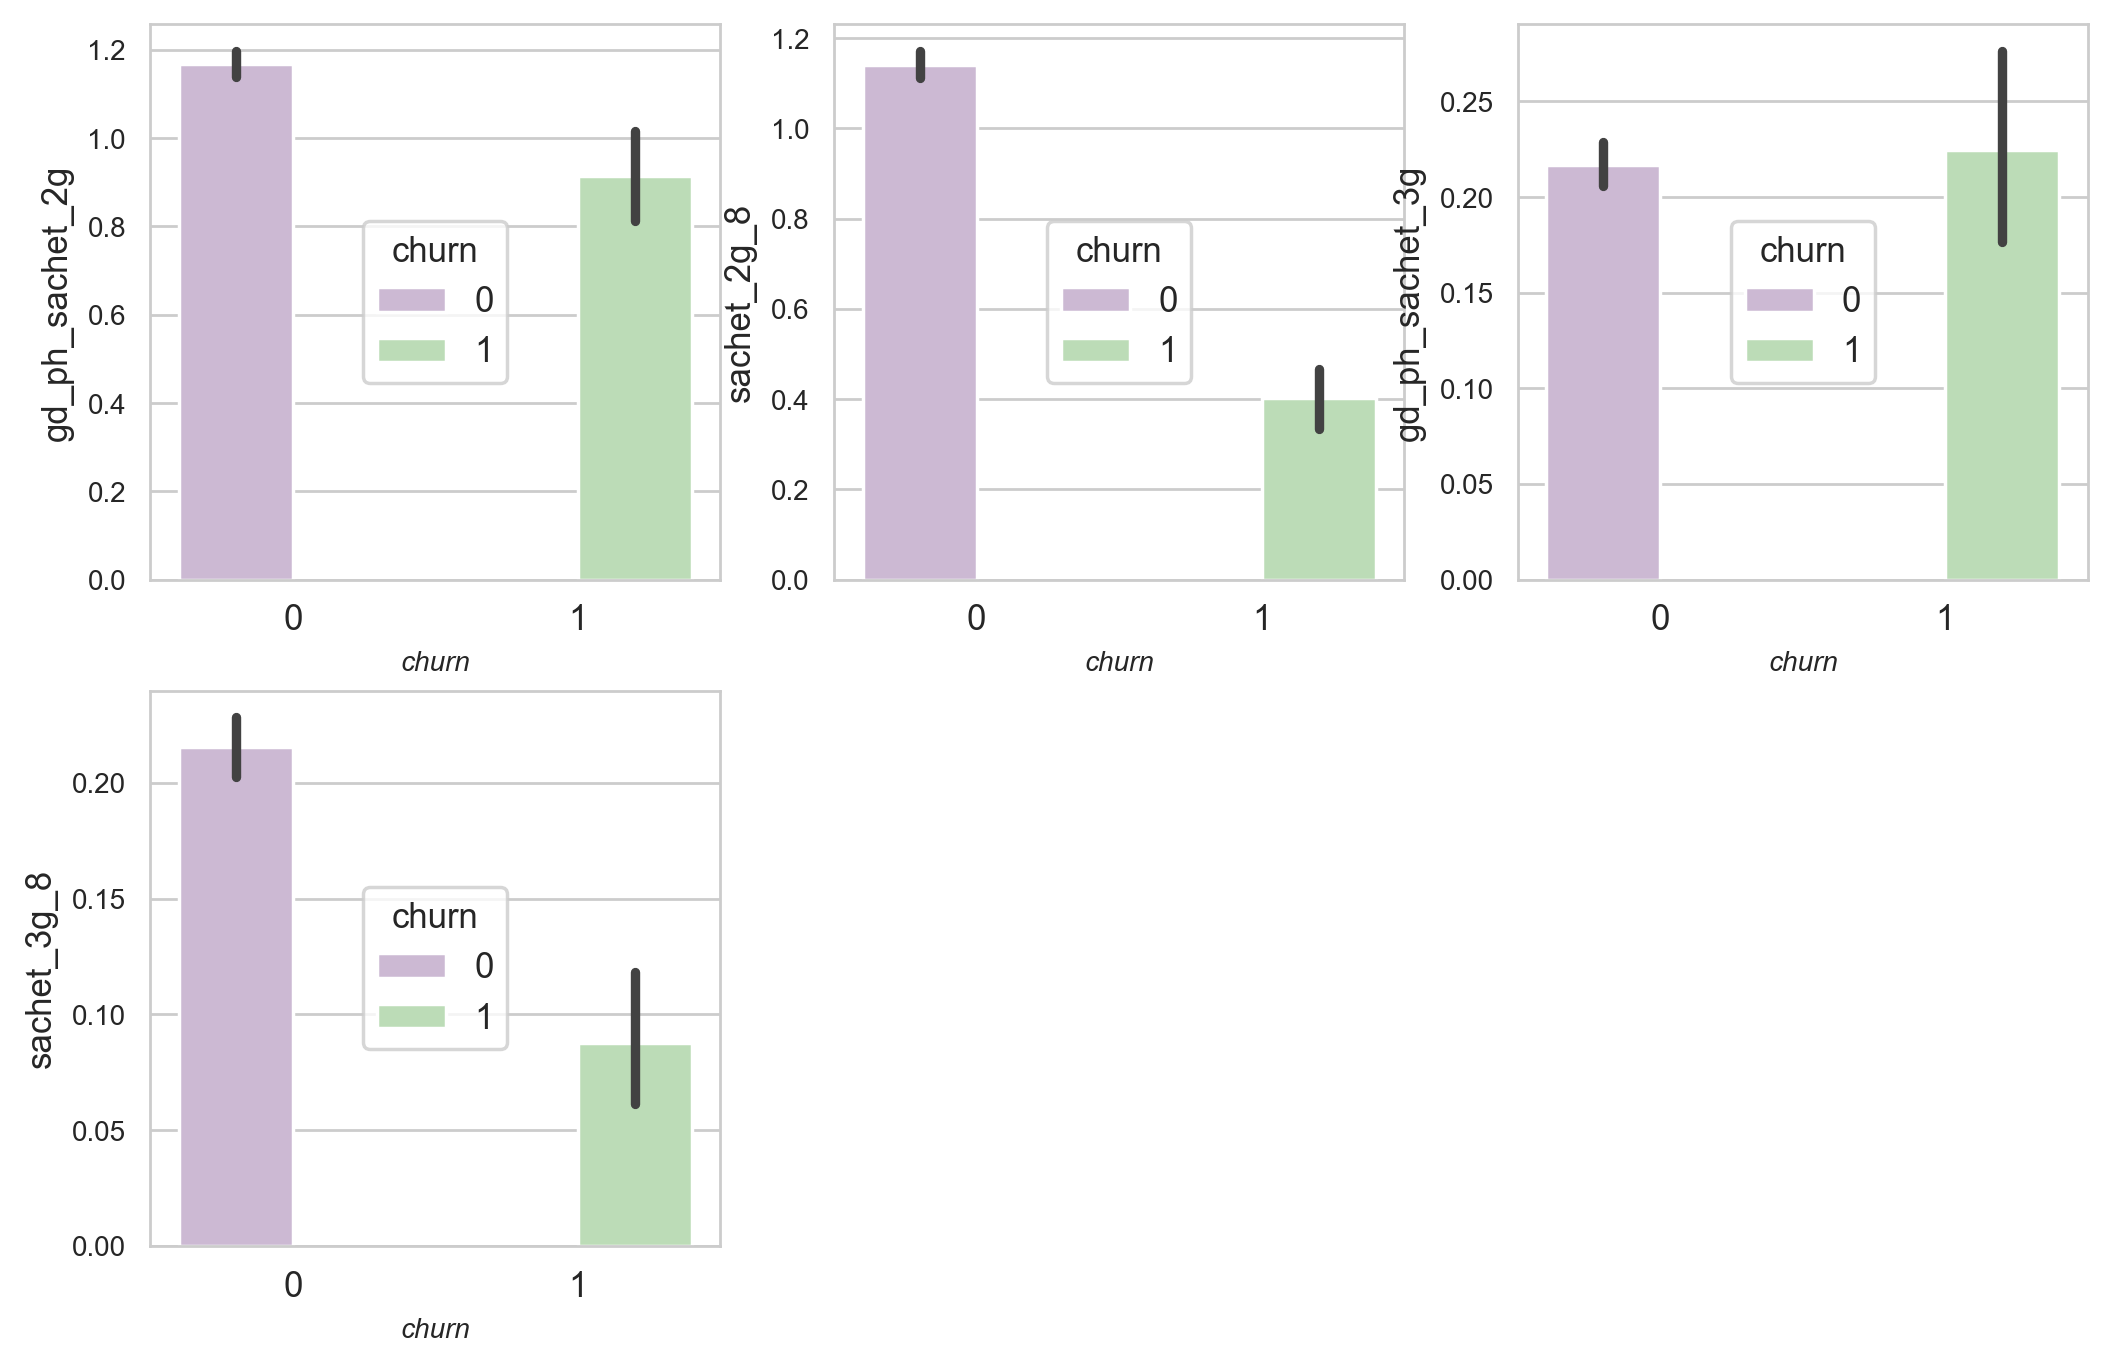

In [56]:
# Schemes with validity smaller than a month for 2G (sachet_2g') and 3G('sachet_3g') features vizualization.
plt.figure(figsize=(10,10),dpi=250)
sns.set_style("whitegrid")
for i,feature in enumerate(["gd_ph_sachet_2g", "sachet_2g_8","gd_ph_sachet_3g", "sachet_3g_8"]):
    plt.subplot(3,3,i+1)
    ax=sns.barplot(data=tele_churn_data_1, y=feature ,x=tele_churn_data_1["churn"], hue="churn", palette=("PRGn"))
    ax.legend(loc="center", title="churn")
    plt.xlabel("churn", fontsize=8, fontstyle='italic')
    plt.yticks(fontsize=8)
plt.show()

#### Observations:                                                                                                               
'sachet_2g' and 'sachet_3g' schemes we largely used in the good phase( 6th and 7th months) and then the trend shows a sudden drop in the usage as we approach the 8th month i.e action phase for churned customers.

In [57]:
# Analysis of the average revenue per customer(ARPU) (churn and not churn) in the action phase:
# Creating churn dataframe
df_churn = tele_churn_data_1[tele_churn_data_1['churn'] == 1]
# Creating not churn dataframe
df_non_churn = tele_churn_data_1[tele_churn_data_1['churn'] == 0]

[Text(0.5, 0, 'Avg. Revenue Per User in Action phase ')]

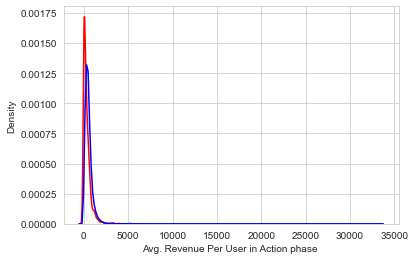

In [58]:
# Distribution plot
# Distribution plot
ax = sns.distplot(df_churn['arpu_8'],label='churn',color='red',hist=False)
ax = sns.distplot(df_non_churn['arpu_8'],label='not churn',color='blue',hist=False)
ax.set(xlabel='Avg. Revenue Per User in Action phase ')

#### Observation: 
ARPU for the churned customers is mostly densed on lower range than ARPU for the not churned customers.
The higher ARPU customers are less likely to be churned.

### Bivariant Analysis:

Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

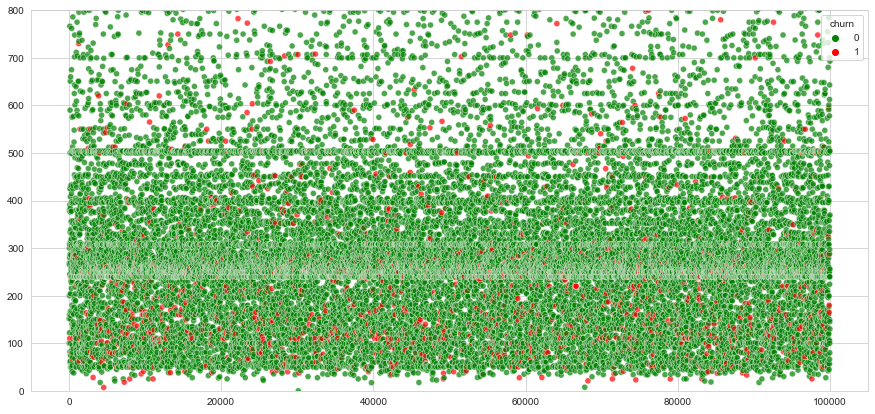

In [59]:
# Cheking Maximum recharge amount:

plt.figure(figsize=(15,7))

sns.scatterplot(x=tele_churn_data_1.index, y=tele_churn_data_1['gd_ph_max_rech_amt'] + tele_churn_data_1['max_rech_amt_8'],
                hue=tele_churn_data_1['churn'], alpha=0.7,palette=['green','red'])
plt.ylim(0,800)
plt.show()

#### Observation: 
Users who had the max recharge amount less than 200 churned more.

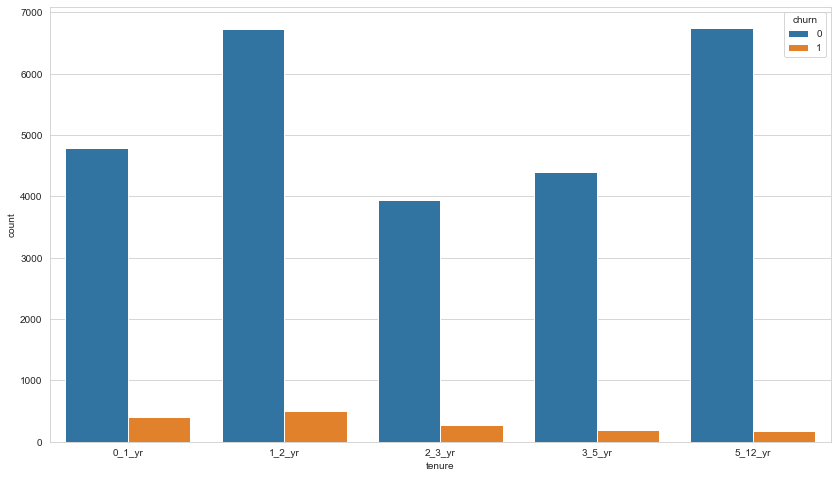

In [60]:
##Visualizing 'age of network' and 'churn'
plt.figure(figsize=(14,8))
tenure_data=tele_churn_data_1[['tenure','churn']]
sns.countplot(x = 'tenure', hue = 'churn',data = tenure_data,palette=("tab10"))
plt.show()

#### Observation:
We see that as the number of years on network (i.e AON) increases, the number of people churned out             (i.e. churn: 1) are reduced.

In [61]:
# Dropping few derived columns, which are not required in further analysis
tele_churn_data_1 = tele_churn_data_1.drop(['diff_rech_num','decrease_rech_num_actionphase','jun_vbc_3g','jul_vbc_3g', 'diff_vbc','decrease_vbc_actionphase'], axis=1)
tele_churn_data_1.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,churn,tenure,gd_ph_std_og_t2t_mou,gd_ph_max_rech_amt,gd_ph_std_ic_t2m_mou,gd_ph_monthly_2g,gd_ph_og_others,gd_ph_vol_2g_mb,gd_ph_sachet_2g,gd_ph_loc_ic_t2t_mou,gd_ph_sachet_3g,gd_ph_roam_og_mou,gd_ph_spl_og_mou,gd_ph_last_day_rech_amt,gd_ph_loc_og_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_std_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_std_ic_t2f_mou,gd_ph_onnet_mou,gd_ph_loc_og_t2t_mou,gd_ph_vol_3g_mb,gd_ph_loc_og_mou,gd_ph_ic_others,gd_ph_std_og_mou,gd_ph_std_og_t2f_mou,gd_ph_isd_og_mou,gd_ph_spl_ic_mou,gd_ph_loc_ic_mou,gd_ph_total_og_mou,gd_ph_total_rech_num,gd_ph_monthly_3g,gd_ph_total_ic_mou,gd_ph_std_ic_mou,gd_ph_total_rech_amt,gd_ph_roam_ic_mou,gd_ph_offnet_mou,gd_ph_arpu,gd_ph_std_ic_t2t_mou,gd_ph_loc_ic_t2m_mou,gd_ph_isd_ic_mou,gd_ph_vbc_3g
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,57.74,1,2_3_yr,13.795,1185.0,109.215,0.0,0.0,0.000,0.0,45.200,0.0,18.165,2.25,0.0,378.005,126.810,0.0,40.825,58.635,43.215,56.26,41.385,0.000,478.035,15.465,68.000,13.37,0.090,0.105,391.555,548.385,5.0,0.0,592.250,176.810,1185.0,24.86,510.295,1209.5150,24.360,219.525,8.295,19.060
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,21.03,0,0_1_yr,124.995,122.0,13.255,0.5,0.0,178.000,0.5,16.840,0.0,0.000,0.00,25.0,75.770,0.000,0.0,11.865,0.000,0.000,382.36,257.360,375.475,333.135,0.000,136.870,0.00,0.000,0.000,52.630,470.010,20.0,0.0,66.175,13.545,519.0,0.00,87.645,435.4720,0.290,35.780,0.000,516.405
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.00,0,0,0,0,0.00,0,1_2_yr,111.935,50.0,52.960,0.0,0.0,0.000,0.0,6.335,0.0,0.000,0.00,25.0,89.870,3.725,0.0,737.050,0.375,0.000,117.26,5.320,0.000,95.565,0.000,848.990,0.00,0.000,0.000,106.505,944.565,24.0,0.0,169.490,62.985,640.0,0.00,827.305,556.1030,10.020,96.430,0.000,0.000
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,0.01,1009.92,0,0,1,1,40.45,0,1_2_yr,0.000,89.5,8.660,0.0,0.0,0.240,0.0,40.875,0.0,0.000,0.05,89.5,82.975,0.000,0.0,4.355,0.000,0.000,49.81,49.810,299.545,132.795,2.675,4.355,0.00,0.005,0.000,145.520,137.210,4.0,1.0,171.235,8.915,227.0,0.00,87.385,134.1235,0.255,104.635,14.115,25.930
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.56,2.45,37.93,0.16,40.54,0.05,0.86,0.13,1.04,41.79,0.0,0.00,0.20,1,455,455,455,7.97,7701.01,0,0,1,0,358.10,0,3_5_yr,0.000,753.5,2.365,0.0,0.0,72.405,0.0,1.155,2.0,0.000,0.00,126.0,0.000,1.020,0.0,0.000,0.000,0.595,0.00,0.000,5832.275,0.000,0.940,0.000,0.00,0.000,0.000,2.180,0.000,10.5,4.5,7.540,4.420,1932.0,0.00,0.000,1669.9265,1.455,0.000,0.000,2210.750


In [62]:
tele_churn_data_1.shape

(28160, 84)

### Checking for the count of churned customers in the obtained dataset.

In [63]:
tele_churn_data_1['churn'].value_counts()

0    26622
1     1538
Name: churn, dtype: int64

In [64]:
print('Churn Rate : {0}%'.format(round(((sum(tele_churn_data_1['churn'])/len(tele_churn_data_1['churn']))*100),2)))

Churn Rate : 5.46%


#### Churn rate is less than 10% of the overall data available. This indicates that we would need to handle the class imbalance in this classification problem.

In [65]:
##Creating an alternate copy of 'tele_churn_data_1' dataframe 
tele_churn_data_2= tele_churn_data_1.copy()

In [66]:
##Rewriting original dataframe 'tele_churn_data_1
tele_churn_data_1 = tele_churn_data_2.copy()

In [67]:
#'tenure' is a categorical variable. Converting it into numeric using get_dummies
# Creating dummies for categorical variable 'tenure'
cat_cols= ['tenure']
tenure_data = pd.get_dummies(tele_churn_data_1['tenure'], prefix='tenure', drop_first = True)
tele_churn_data_1 = pd.concat([tele_churn_data_1, tenure_data], axis = 1)

##Dropping the 'tenure' column
tele_churn_data_1.drop(cat_cols, axis=1, inplace=True)

In [68]:
tele_churn_data_1.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,churn,gd_ph_std_og_t2t_mou,gd_ph_max_rech_amt,gd_ph_std_ic_t2m_mou,gd_ph_monthly_2g,gd_ph_og_others,gd_ph_vol_2g_mb,gd_ph_sachet_2g,gd_ph_loc_ic_t2t_mou,gd_ph_sachet_3g,gd_ph_roam_og_mou,gd_ph_spl_og_mou,gd_ph_last_day_rech_amt,gd_ph_loc_og_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_std_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_std_ic_t2f_mou,gd_ph_onnet_mou,gd_ph_loc_og_t2t_mou,gd_ph_vol_3g_mb,gd_ph_loc_og_mou,gd_ph_ic_others,gd_ph_std_og_mou,gd_ph_std_og_t2f_mou,gd_ph_isd_og_mou,gd_ph_spl_ic_mou,gd_ph_loc_ic_mou,gd_ph_total_og_mou,gd_ph_total_rech_num,gd_ph_monthly_3g,gd_ph_total_ic_mou,gd_ph_std_ic_mou,gd_ph_total_rech_amt,gd_ph_roam_ic_mou,gd_ph_offnet_mou,gd_ph_arpu,gd_ph_std_ic_t2t_mou,gd_ph_loc_ic_t2m_mou,gd_ph_isd_ic_mou,gd_ph_vbc_3g,tenure_1_2_yr,tenure_2_3_yr,tenure_3_5_yr,tenure_5_12_yr
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,57.74,1,13.795,1185.0,109.215,0.0,0.0,0.000,0.0,45.200,0.0,18.165,2.25,0.0,378.005,126.810,0.0,40.825,58.635,43.215,56.26,41.385,0.000,478.035,15.465,68.000,13.37,0.090,0.105,391.555,548.385,5.0,0.0,592.250,176.810,1185.0,24.86,510.295,1209.5150,24.360,219.525,8.295,19.060,0,1,0,0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,21.03,0,124.995,122.0,13.255,0.5,0.0,178.000,0.5,16.840,0.0,0.000,0.00,25.0,75.770,0.000,0.0,11.865,0.000,0.000,382.36,257.360,375.475,333.135,0.000,136.870,0.00,0.000,0.000,52.630,470.010,20.0,0.0,66.175,13.545,519.0,0.00,87.645,435.4720,0.290,35.780,0.000,516.405,0,0,0,0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.00,0,0,0,0,0.00,0,111.935,50.0,52.960,0.0,0.0,0.000,0.0,6.335,0.0,0.000,0.00,25.0,89.870,3.725,0.0,737.050,0.375,0.000,117.26,5.320,0.000,95.565,0.000,848.990,0.00,0.000,0.000,106.505,944.565,24.0,0.0,169.490,62.985,640.0,0.00,827.305,556.1030,10.020,96.430,0.000,0.000,1,0,0,0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,0.01,1009.92,0,0,1,1,40.45,0,0.000,89.5,8.660,0.0,0.0,0.240,0.0,40.875,0.0,0.000,0.05,89.5,82.975,0.000,0.0,4.355,0.000,0.000,49.81,49.810,299.545,132.795,2.675,4.355,0.00,0.005,0.000,145.520,137.210,4.0,1.0,171.235,8.915,227.0,0.00,87.385,134.1235,0.255,104.635,14.115,25.930,1,0,0,0
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.56,2.45,37.93,0.16,40.54,0.05,0.86,0.13,1.04,41.79,0.0,0.00,0.20,1,455,455,455,7.97,7701.01,0,0,1,0,358.10,0,0.000,753.5,2.365,0.0,0.0,72.405,0.0,1.155,2.0,0.000,0.00,126.0,0.000,1.020,0.0,0.000,0.000,0.595,0.00,0.000,5832.275,0.000,0.940,0.000,0.00,0.000,0.000,2.180,0.000,10.5,4.5,7.540,4.420,1932.0,0.00,0.000,1669.9265,1.455,0.000,0.000,2210.750,0,0,1,0


#### All the features are converted into numeric types.

#### Checking the Correlation between independent variables (multicollinearity)

In [69]:
## Eliminating those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.

corr_df = tele_churn_data_1.drop(['churn'],axis =1)
corr_matx = corr_df.corr().abs()
corr_matx

upper_triangle =corr_matx.where(np.triu(np.ones(corr_matx.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]

#Reduces multicollinearity (if any)
col_to_drop  #columns to drop from df. Independent predictors highly correlated to each other

['loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'total_rech_amt_8',
 'gd_ph_std_og_t2t_mou',
 'gd_ph_max_rech_amt',
 'gd_ph_std_ic_t2m_mou',
 'gd_ph_sachet_2g',
 'gd_ph_loc_ic_t2t_mou',
 'gd_ph_loc_og_t2m_mou',
 'gd_ph_loc_ic_t2f_mou',
 'gd_ph_std_og_t2m_mou',
 'gd_ph_loc_og_t2f_mou',
 'gd_ph_std_ic_t2f_mou',
 'gd_ph_onnet_mou',
 'gd_ph_loc_og_t2t_mou',
 'gd_ph_vol_3g_mb',
 'gd_ph_loc_og_mou',
 'gd_ph_ic_others',
 'gd_ph_std_og_mou',
 'gd_ph_std_og_t2f_mou',
 'gd_ph_isd_og_mou',
 'gd_ph_loc_ic_mou',
 'gd_ph_total_og_mou',
 'gd_ph_total_rech_num',
 'gd_ph_total_ic_mou',
 'gd_ph_std_ic_mou',
 'gd_ph_total_rech_amt',
 'gd_ph_offnet_mou',
 'gd_ph_arpu',
 'gd_ph_std_ic_t2t_mou',
 'gd_ph_loc_ic_t2m_mou',
 'gd_ph_isd_ic_mou',
 'gd_ph_vbc_3g']

In [70]:
##Dropping the strongly correlated variables 'cols_to_drop' from 'tele_churn_data_1' dataframe
tele_churn_data_1.drop(col_to_drop, axis=1, inplace= True)

In [71]:
tele_churn_data_1.shape

(28160, 48)

In [72]:
# Creating a function to find binary value columns from the 'tele_churn_data_1' dataframe.
def binary_value_cols(dataframe):
    dataframe_1 = dataframe.copy()
    binarycolumn = (dataframe_1.nunique()==2)
    list_binarycolumn = list(binarycolumn [binarycolumn .values==True].index)
    return list_binarycolumn

binary_cols_list =  binary_value_cols(dataframe= tele_churn_data_1)
print(binary_cols_list)

['churn', 'tenure_1_2_yr', 'tenure_2_3_yr', 'tenure_3_5_yr', 'tenure_5_12_yr']


### Step 5: Test-Train Split and Feature scaling

In [73]:
# divide data into train and test
##split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(tele_churn_data_1, train_size=0.7, test_size = 0.3, random_state=42)

In [74]:
# Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols_list]
df_binary_test =df_test.loc[:, binary_cols_list]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop( binary_cols_list, axis=1)
df_test = df_test.drop( binary_cols_list, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_colms = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_colms] = scaler.fit_transform(df_train[all_colms])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_colms] = scaler.transform(df_test[all_colms])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [75]:
print(df_train.shape)
print(df_test.shape)

(19712, 48)
(8448, 48)


In [76]:
##Scaled train-data
df_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,gd_ph_monthly_2g,gd_ph_og_others,gd_ph_vol_2g_mb,gd_ph_sachet_3g,gd_ph_roam_og_mou,gd_ph_spl_og_mou,gd_ph_last_day_rech_amt,gd_ph_loc_og_t2c_mou,gd_ph_spl_ic_mou,gd_ph_monthly_3g,gd_ph_roam_ic_mou,churn,tenure_1_2_yr,tenure_2_3_yr,tenure_3_5_yr,tenure_5_12_yr
91326,-0.311862,-0.256310,-0.401638,-0.172585,-0.196664,0.172467,-0.076708,-0.145419,-0.041366,1.551443,-0.054871,-0.250241,-0.017895,0.152663,0.127863,-0.306586,-0.173932,-0.279382,-0.117696,-0.242227,-0.157854,0.440540,-0.911491,-0.074100,0.253887,-0.198944,0.218255,-0.387463,-0.040046,-0.336289,0.774758,0.641879,0.805537,0.050029,-0.325257,0.311172,-0.253215,-0.309372,0.234485,-0.136117,-0.400494,-0.381146,-0.239917,0,0,0,0,0
97656,-1.025978,-0.518407,-0.747859,-0.194634,-0.184588,-0.342003,-0.673073,-0.306700,-0.232999,-0.154364,-0.054871,-0.318727,-0.017895,-0.413506,-0.706987,-0.342948,-0.192946,-0.279382,-0.133926,-0.242227,-0.157854,-0.089509,-0.803226,-0.972167,-0.669113,-0.343927,-0.387194,-0.387463,-0.425110,-0.336289,-0.190909,-0.415260,-0.467716,-0.198610,-0.421137,-0.227970,0.134554,-0.327117,0.106285,-0.257222,-0.400494,-0.381146,-0.202423,0,0,0,0,0
42029,0.660768,1.447351,0.204729,-0.194634,-0.196664,-0.211151,-0.246113,-0.306700,-0.232999,-0.154364,0.038478,0.024160,-0.017895,-0.251438,-0.346104,-0.342948,-0.192946,0.378055,-0.133926,-0.242227,-0.157854,-0.089509,2.011659,-0.204083,-0.456113,-0.343927,-0.387194,-0.387463,-0.425110,-0.336289,-0.190909,-0.415260,-0.467716,-0.198610,-0.421137,-0.227970,-0.253215,-0.303457,-0.598818,-0.122420,-0.400494,-0.381146,-0.239917,0,1,0,0,0
27936,-0.213592,-0.441761,-0.586144,-0.194634,-0.196664,-0.185141,-0.480362,0.997806,-0.232999,-0.154364,-0.054871,-0.318727,-0.017895,-0.275785,0.086106,1.681162,-0.169113,-0.209235,-0.133926,-0.242227,-0.157854,-0.089509,-1.019755,-0.062283,0.424287,-0.227979,-0.173212,2.039507,-0.425110,-0.336289,-0.190909,0.048527,0.805537,-0.198610,-0.013952,-0.227970,-0.253215,-0.373028,3.086946,-0.257222,-0.400494,0.509354,-0.239917,0,0,0,0,1
50834,0.316060,-0.445568,0.181426,-0.194634,-0.196664,-0.202257,0.507306,-0.126734,-0.232999,-0.154364,-0.054871,-0.318270,-0.017895,-0.351283,0.317249,0.290071,-0.064276,1.558104,-0.133926,-0.242227,-0.157854,-0.089509,-0.370167,-0.062283,0.253887,0.309566,0.057664,2.039507,-0.425110,-0.336289,-0.190909,0.667559,3.352043,-0.198610,-0.364588,-0.227970,-0.253215,-0.373028,0.188699,-0.257222,-0.400494,-0.381146,-0.239917,0,0,0,0,1


In [77]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['churn'].reset_index(drop=True)
y_test = df_test['churn'].reset_index(drop=True)

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('churn',axis=1).reset_index(drop=True)
X_test = df_test.drop('churn',axis=1).reset_index(drop=True)

In [78]:
##Dealing with class imbalance 
y= tele_churn_data_2['churn']
print("Before Reampling, counts of label '1'(train_set): {}".format(sum(y_train==1)))
print("Before Resampling, counts of label '0'(train_set): {} \n".format(sum(y_train==0)))
print("Before Resampling, churn event rate (Entire Dataset): {}% \n".format(round(sum(y==1)/len(y)*100,3)))

Before Reampling, counts of label '1'(train_set): 1075
Before Resampling, counts of label '0'(train_set): 18637 

Before Resampling, churn event rate (Entire Dataset): 5.462% 



#### We have almost 5.458%  churn rate.

In [79]:
# let's build the logistic regression base model and check for stats (on unbalanced class dataset)

from sklearn.metrics import classification_report
from collections import Counter
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

# logistic regression object 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
predictions_train = lr.predict(X_train)

  
# predictions and print classification report  for test data
y_pred = lr.predict(X_test)


print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9449573863636364
F1 score:  0.045174537987679675
Recall:  0.023758099352051837
Precision:  0.4583333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      7985
           1       0.46      0.02      0.05       463

    accuracy                           0.94      8448
   macro avg       0.70      0.51      0.51      8448
weighted avg       0.92      0.94      0.92      8448


 confussion matrix:
 [[7972   13]
 [ 452   11]]


Observations:             
(i) The accuracy is around 94 % but it doesn't conludes as a good evaluation metric as the classes are imbalanced in the dataset.    

(ii)  The recall of Churned (Sensitivity) is 0.02 is low and the recall of Not Churned i.e.(Specificity) is high, 1.00.   

(iii) This is not desired since we need to reduce the False Negatives.   
(iv)  For better prediction of Churned, the sensitivity has to be high and Specificity (recall for Not Churned) has to be low.   
(v)   In this problem we will use recall as evaluation metric because we would like to capture the performace where we will be rightly predicting positive classes.

### Step 6:  Handling Imbalanced Dataset

We can handle imbalanced classes by balancing the classes by increasing minority or decreasing majority.

We can do that by following few techniques
1. Random Under-Sampling
2. Random Over-Sampling
3. SMOTE - Synthetic Minority Oversampling Technique
4. ADASYN - Adaptive Synthetic Sampling Method
5. SMOTETomek - Over-sampling followed by under-sampling
6. Tomek Links

 When to Use resampling methods
#### Use resampling methods on your training set, never on your test set!

### Using Logistic Regression

In [80]:
##SMOTETomek' (SMOTE and Tomek links hybrid technique) to deal with the class imbalance

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled_smt_tmk, y_resampled_smt_tmk= smote_tomek.fit_resample(X_train, y_train)

In [81]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 18623), (1, 18623)]


In [82]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [83]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.8051609848484849
F1 score:  0.2899050905953408
Recall:  0.7257019438444925
Precision:  0.1811320754716981

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      7985
           1       0.18      0.73      0.29       463

    accuracy                           0.81      8448
   macro avg       0.58      0.77      0.59      8448
weighted avg       0.94      0.81      0.85      8448


 confussion matrix:
 [[6466 1519]
 [ 127  336]]


In [84]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

2150

In [85]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 1075), (1, 1075)]


In [86]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [87]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.736032196969697
F1 score:  0.25418060200668896
Recall:  0.8207343412526998
Precision:  0.15037593984962405

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84      7985
           1       0.15      0.82      0.25       463

    accuracy                           0.74      8448
   macro avg       0.57      0.78      0.55      8448
weighted avg       0.94      0.74      0.81      8448


 confussion matrix:
 [[5838 2147]
 [  83  380]]


In [88]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

19465

In [89]:
print(sorted(Counter(y_resampled_tomek).items()))

[(0, 18390), (1, 1075)]


In [90]:
lreg_tomek = LogisticRegression()
lreg_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_tomek = lreg_tomek.predict(X_test)

In [91]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_tomek))
print ('Recall: ', recall_score(y_test, y_pred_tomek))
print ('Precision: ', precision_score(y_test, y_pred_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_tomek))

Accuracy:  0.9453125
F1 score:  0.06477732793522267
Recall:  0.03455723542116631
Precision:  0.5161290322580645

 clasification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      7985
           1       0.52      0.03      0.06       463

    accuracy                           0.95      8448
   macro avg       0.73      0.52      0.52      8448
weighted avg       0.92      0.95      0.92      8448


 confussion matrix:
 [[7970   15]
 [ 447   16]]


In [92]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

37274

In [93]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 18637), (1, 18637)]


In [94]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [95]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.7471590909090909
F1 score:  0.26344827586206904
Recall:  0.8250539956803455
Precision:  0.15675010258514568

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      7985
           1       0.16      0.83      0.26       463

    accuracy                           0.75      8448
   macro avg       0.57      0.78      0.56      8448
weighted avg       0.94      0.75      0.82      8448


 confussion matrix:
 [[5930 2055]
 [  81  382]]


In [96]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

37274

In [97]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 18637), (1, 18637)]


In [98]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [99]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.8035037878787878
F1 score:  0.2869415807560137
Recall:  0.7213822894168467
Precision:  0.17908847184986595

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      7985
           1       0.18      0.72      0.29       463

    accuracy                           0.80      8448
   macro avg       0.58      0.76      0.59      8448
weighted avg       0.94      0.80      0.85      8448


 confussion matrix:
 [[6454 1531]
 [ 129  334]]


In [100]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

37336

In [101]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [102]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.7871685606060606
F1 score:  0.27616747181964574
Recall:  0.7408207343412527
Precision:  0.16971796140524492

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      7985
           1       0.17      0.74      0.28       463

    accuracy                           0.79      8448
   macro avg       0.58      0.77      0.58      8448
weighted avg       0.94      0.79      0.84      8448


 confussion matrix:
 [[6307 1678]
 [ 120  343]]


### Using Decision Trees

In [103]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(tele_churn_data_1, train_size=0.7, test_size = 0.3, random_state=42)

In [104]:
# Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols_list]
df_binary_test =df_test.loc[:, binary_cols_list]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop( binary_cols_list, axis=1)
df_test = df_test.drop( binary_cols_list, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_colms = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_colms] = scaler.fit_transform(df_train[all_colms])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_colms] = scaler.transform(df_test[all_colms])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [105]:
print(df_train.shape)
print(df_test.shape)

(19712, 48)
(8448, 48)


In [106]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['churn'].reset_index(drop=True)
y_test = df_test['churn'].reset_index(drop=True)

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('churn',axis=1).reset_index(drop=True)
X_test = df_test.drop('churn',axis=1).reset_index(drop=True)

In [107]:
# Decision Trees - Base
from sklearn.tree import DecisionTreeClassifier
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [108]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [109]:
y_pred_rf = dt_base.predict(X_test)

In [110]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [111]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9473248106060606
F1 score:  0.35036496350364965
Recall:  0.2591792656587473
Precision:  0.5405405405405406

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      7985
           1       0.54      0.26      0.35       463

    accuracy                           0.95      8448
   macro avg       0.75      0.62      0.66      8448
weighted avg       0.94      0.95      0.94      8448


 confussion matrix:
 [[7883  102]
 [ 343  120]]


In [112]:
# SMOTE+TOMEK
from sklearn.tree import DecisionTreeClassifier
dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
dtc_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_dtc_smt_tmk = dtc_smt_tmk.predict(X_test)

In [113]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt_tmk))

Accuracy:  0.8894412878787878
F1 score:  0.2945619335347432
Recall:  0.42116630669546434
Precision:  0.2264808362369338

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      7985
           1       0.23      0.42      0.29       463

    accuracy                           0.89      8448
   macro avg       0.60      0.67      0.62      8448
weighted avg       0.92      0.89      0.90      8448


 confussion matrix:
 [[7319  666]
 [ 268  195]]


In [114]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

37336

In [115]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [116]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  0.8860085227272727
F1 score:  0.2882483370288248
Recall:  0.42116630669546434
Precision:  0.21910112359550563

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      7985
           1       0.22      0.42      0.29       463

    accuracy                           0.89      8448
   macro avg       0.59      0.67      0.61      8448
weighted avg       0.92      0.89      0.90      8448


 confussion matrix:
 [[7290  695]
 [ 268  195]]


In [117]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

2150

In [118]:
# Decision Trees - Random UnderSampling
from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us, y_resampled_us)

y_pred_dtc_us = dtc_us.predict(X_test)

In [119]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.7419507575757576
F1 score:  0.23615977575332867
Recall:  0.7278617710583153
Precision:  0.1409452112086993

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      7985
           1       0.14      0.73      0.24       463

    accuracy                           0.74      8448
   macro avg       0.56      0.74      0.54      8448
weighted avg       0.93      0.74      0.81      8448


 confussion matrix:
 [[5931 2054]
 [ 126  337]]


In [120]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

19465

In [121]:
# Decision Trees - Tomek Links
from sklearn.tree import DecisionTreeClassifier
dtc_tomek = DecisionTreeClassifier(random_state=0)
dtc_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_dtc_tomek = dtc_tomek.predict(X_test)

In [122]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_tomek))
print ('Recall: ', recall_score(y_test, y_pred_dtc_tomek))
print ('Precision: ', precision_score(y_test, y_pred_dtc_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_tomek))

Accuracy:  0.9180871212121212
F1 score:  0.3107569721115538
Recall:  0.3369330453563715
Precision:  0.28835489833641403

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      7985
           1       0.29      0.34      0.31       463

    accuracy                           0.92      8448
   macro avg       0.62      0.64      0.63      8448
weighted avg       0.92      0.92      0.92      8448


 confussion matrix:
 [[7600  385]
 [ 307  156]]


In [123]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

37274

In [124]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [125]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9243607954545454
F1 score:  0.32093517534537724
Recall:  0.326133909287257
Precision:  0.3158995815899582

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      7985
           1       0.32      0.33      0.32       463

    accuracy                           0.92      8448
   macro avg       0.64      0.64      0.64      8448
weighted avg       0.93      0.92      0.92      8448


 confussion matrix:
 [[7658  327]
 [ 312  151]]


In [126]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

37274

In [127]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [128]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.8882575757575758
F1 score:  0.2955223880597015
Recall:  0.42764578833693306
Precision:  0.22576966932725198

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      7985
           1       0.23      0.43      0.30       463

    accuracy                           0.89      8448
   macro avg       0.60      0.67      0.62      8448
weighted avg       0.92      0.89      0.90      8448


 confussion matrix:
 [[7306  679]
 [ 265  198]]


### Using Random Forest

In [129]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [130]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9474431818181818
F1 score:  0.31269349845201233
Recall:  0.21814254859611232
Precision:  0.5519125683060109

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      7985
           1       0.55      0.22      0.31       463

    accuracy                           0.95      8448
   macro avg       0.75      0.60      0.64      8448
weighted avg       0.93      0.95      0.94      8448


 confussion matrix:
 [[7903   82]
 [ 362  101]]


In [131]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [132]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.8583096590909091
F1 score:  0.3742812336644015
Recall:  0.7732181425485961
Precision:  0.24689655172413794

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      7985
           1       0.25      0.77      0.37       463

    accuracy                           0.86      8448
   macro avg       0.62      0.82      0.65      8448
weighted avg       0.94      0.86      0.89      8448


 confussion matrix:
 [[6893 1092]
 [ 105  358]]


In [133]:
# Random Forest - Tomek Links
rf_tomek = RandomForestClassifier()
rf_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_rf_tomek = rf_tomek.predict(X_test)

In [134]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_rf_tomek))
print ('Recall: ', recall_score(y_test, y_pred_rf_tomek))
print ('Precision: ', precision_score(y_test, y_pred_rf_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_tomek))

Accuracy:  0.9486268939393939
F1 score:  0.3541666666666667
Recall:  0.2570194384449244
Precision:  0.569377990430622

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      7985
           1       0.57      0.26      0.35       463

    accuracy                           0.95      8448
   macro avg       0.76      0.62      0.66      8448
weighted avg       0.94      0.95      0.94      8448


 confussion matrix:
 [[7895   90]
 [ 344  119]]


In [135]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [136]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9479166666666666
F1 score:  0.4195250659630607
Recall:  0.3434125269978402
Precision:  0.5389830508474577

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      7985
           1       0.54      0.34      0.42       463

    accuracy                           0.95      8448
   macro avg       0.75      0.66      0.70      8448
weighted avg       0.94      0.95      0.94      8448


 confussion matrix:
 [[7849  136]
 [ 304  159]]


In [137]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [138]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9343039772727273
F1 score:  0.45212240868706816
Recall:  0.4946004319654428
Precision:  0.4163636363636364

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      7985
           1       0.42      0.49      0.45       463

    accuracy                           0.93      8448
   macro avg       0.69      0.73      0.71      8448
weighted avg       0.94      0.93      0.94      8448


 confussion matrix:
 [[7664  321]
 [ 234  229]]


In [139]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [140]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9351325757575758
F1 score:  0.4574257425742574
Recall:  0.49892008639308855
Precision:  0.42230347349177333

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      7985
           1       0.42      0.50      0.46       463

    accuracy                           0.94      8448
   macro avg       0.70      0.73      0.71      8448
weighted avg       0.94      0.94      0.94      8448


 confussion matrix:
 [[7669  316]
 [ 232  231]]


In [141]:
# Random Forest - SMOTE+TOMEK
rf_smt_tmk = RandomForestClassifier()
rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [142]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))

Accuracy:  0.9347774621212122
F1 score:  0.45714285714285713
Recall:  0.5010799136069114
Precision:  0.42028985507246375

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      7985
           1       0.42      0.50      0.46       463

    accuracy                           0.93      8448
   macro avg       0.70      0.73      0.71      8448
weighted avg       0.94      0.93      0.94      8448


 confussion matrix:
 [[7665  320]
 [ 231  232]]


##### As we can see from above resampling techniques that, recall value in using Logistic regression random undersampling and oversamplings.  We can also notice that recall values of logistic regression for both under and oversamplings are closer to each other.

#### We will pick up 'Logistic Regression with Random oversampling' method.

In [143]:
##Implementing 'Random OverSampling' technique to deal with the class imbalance

from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)

print('After Random overersampling, the shape of train_X: {}'.format(X_resampled_os.shape))
print('After Random overersampling, the shape of train_y: {} \n'.format(y_resampled_os.shape))

print("After Random overersampling, counts of label '1': {}".format(sum(y_resampled_os==1)))
print("After Random overersampling, counts of label '0': {}".format(sum(y_resampled_os==0)))
print("After Random overersampling, churn event rate : {}% \n".format(round(sum(y_resampled_os==1)/len(y_resampled_os)*100,2)))

After Random overersampling, the shape of train_X: (37274, 47)
After Random overersampling, the shape of train_y: (37274,) 

After Random overersampling, counts of label '1': 18637
After Random overersampling, counts of label '0': 18637
After Random overersampling, churn event rate : 50.0% 



### Step 7: Model Building 

In [144]:
# Logistic regression model
import statsmodels.api as sm
lm_1 = sm.GLM(y_resampled_os,(sm.add_constant(X_resampled_os)), family = sm.families.Binomial())
lm_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37274
Model:                            GLM   Df Residuals:                    37226
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18552.
Date:                Mon, 17 Apr 2023   Deviance:                       37105.
Time:                        23:59:48   Pearson chi2:                 3.61e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7851      0.032    -24.669      0.000      -0.848      -0.723
arpu_8                      0.2356      0.040      5.929      0.000       0.158       0.313
onnet_mou_8                -0.0979      0.020     -4.943      0.000      -0.137      -0.059
offnet_mou_8               -0.1650      0.021     -7.964      0.000      -0.206      -0.124
roam_ic_mou_8               0.0201      0.019      1.049      0.294      -0.017       0.058
roam_og_mou_8               0.1882      0.022      8.626      0.000       0.145       0.231
loc_og_t2t_mou_8           -0.1960      0.032     -6.130      0.000      -0.259      -0.133
loc_og_t2m_mou_8           -0.3406      0.031    -10.930      0.000      -0.402      -0.280
loc_og_t2f_mou_8           -0.0303      0.024     -1.288      0.198      -0.076       0.016
loc_og_t2c_mou_8            0.1663      0.022      7.732      0.000       0.124       0.208
std_og_t2f_mou_8           -0.0465      0.019     -2.493      0.013      -0.083      -0.010
isd_og_mou_8               -0.1895      0.030     -6.238      0.000      -0.249      -0.130
spl_og_mou_8               -0.2541      0.031     -8.287      0.000      -0.314      -0.194
og_others_8                -0.0713      0.029     -2.445      0.014      -0.129      -0.014
loc_ic_t2t_mou_8           -0.5414      0.044    -12.384      0.000      -0.627      -0.456
loc_ic_t2m_mou_8           -0.4931      0.034    -14.393      0.000      -0.560      -0.426
loc_ic_t2f_mou_8           -0.3988      0.039    -10.342      0.000      -0.474      -0.323
std_ic_t2t_mou_8           -0.1240      0.026     -4.724      0.000      -0.175      -0.073
std_ic_t2m_mou_8           -0.1872      0.024     -7.882      0.000      -0.234      -0.141
std_ic_t2f_mou_8           -0.1255      0.033     -3.748      0.000      -0.191      -0.060
spl_ic_mou_8               -0.1437      0.018     -7.805      0.000      -0.180      -0.108
isd_ic_mou_8               -0.0667      0.020     -3.305      0.001      -0.106      -0.027
ic_others_8                 0.0231      0.016      1.441      0.150      -0.008       0.054
total_rech_num_8           -0.3496      0.021    -16.721      0.000      -0.391      -0.309
max_rech_amt_8              0.1594      0.023      6.884      0.000       0.114       0.205
last_day_rech_amt_8        -0.4919      0.022    -22.430      0.000      -0.535      -0.449
vol_2g_mb_8                -0.1545      0.025     -6.064      0.000      -0.205      -0.105
vol_3g_mb_8                -0.2384      0.041     -5.799      0.000      -0.319      -0.158
monthly_2g_8               -0.4886      0.027    -18.344      0.000      -0.541      -0.436
sachet_2g_8                -0.5335      0.023    -23.249      0.000      -0.578      -0.489
monthly_3g_8               -0.6823      0.037  

### Step 8: Feature Selection Using RFE

In [145]:
logreg = LogisticRegression()  
logreg

LogisticRegression()

In [146]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,step = 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_resampled_os, y_resampled_os)

In [147]:
list(zip(X_resampled_os.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', False, 2),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 2),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 2),
 ('loc_og_t2c_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 2),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_8', True, 1),
 ('og_others_8', False, 2),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 2),
 ('std_ic_t2m_mou_8', True, 1),
 ('std_ic_t2f_mou_8', False, 2),
 ('spl_ic_mou_8', False, 2),
 ('isd_ic_mou_8', False, 2),
 ('ic_others_8', False, 2),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 2),
 ('last_day_rech_amt_8', True, 1),
 ('vol_2g_mb_8', False, 2),
 ('vol_3g_mb_8', True, 1),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_8', True, 1),
 ('aug_vbc_3g', False, 2),
 ('gd_ph_monthly_2g', True, 1),
 ('gd_ph_og_oth

In [148]:
col = X_resampled_os.columns[rfe.support_]

In [149]:
X_resampled_os.columns[~rfe.support_]

Index(['onnet_mou_8', 'roam_ic_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2f_mou_8',
       'og_others_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'ic_others_8', 'max_rech_amt_8', 'vol_2g_mb_8',
       'aug_vbc_3g', 'gd_ph_og_others', 'gd_ph_vol_2g_mb', 'gd_ph_roam_og_mou',
       'gd_ph_spl_og_mou', 'gd_ph_last_day_rech_amt', 'gd_ph_loc_og_t2c_mou',
       'gd_ph_spl_ic_mou', 'gd_ph_monthly_3g', 'gd_ph_roam_ic_mou',
       'tenure_1_2_yr', 'tenure_2_3_yr'],
      dtype='object')

In [150]:
##Creating X_resampled_us_sm dataframe with RFE selected variables
X_resampled_os_sm = X_resampled_os[col]

In [151]:
X_resampled_os_sm = sm.add_constant(X_resampled_os[col])
lm_2 = sm.GLM(y_resampled_os,X_resampled_os_sm, family = sm.families.Binomial())
res = lm_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37274
Model:                            GLM   Df Residuals:                    37250
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18886.
Date:                Mon, 17 Apr 2023   Deviance:                       37771.
Time:                        23:59:52   Pearson chi2:                 1.02e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7912      0.022    -36.135      0.000      -0.834      -0.748
arpu_8                  0.1827      0.028      6.531      0.000       0.128       0.237
offnet_mou_8           -0.1460      0.018     -7.909      0.000      -0.182      -0.110
roam_og_mou_8           0.3286      0.016     20.739      0.000       0.298       0.360
loc_og_t2t_mou_8       -0.2237      0.030     -7.426      0.000      -0.283      -0.165
loc_og_t2m_mou_8       -0.2967      0.030     -9.901      0.000      -0.355      -0.238
loc_og_t2c_mou_8        0.1736      0.017      9.964      0.000       0.139       0.208
isd_og_mou_8           -0.1113      0.023     -4.858      0.000      -0.156      -0.066
spl_og_mou_8           -0.1636      0.024     -6.794      0.000      -0.211      -0.116
loc_ic_t2t_mou_8       -0.5632      0.044    -12.891      0.000      -0.649      -0.478
loc_ic_t2m_mou_8       -0.5141      0.034    -15.153      0.000      -0.581      -0.448
loc_ic_t2f_mou_8       -0.3974      0.036    -11.049      0.000      -0.468      -0.327
std_ic_t2m_mou_8       -0.1900      0.022     -8.486      0.000      -0.234      -0.146
total_rech_num_8       -0.4215      0.019    -21.984      0.000      -0.459      -0.384
last_day_rech_amt_8    -0.4002      0.019    -20.815      0.000      -0.438      -0.363
vol_3g_mb_8            -0.1390      0.034     -4.058      0.000      -0.206      -0.072
monthly_2g_8           -0.5284      0.024    -21.775      0.000      -0.576      -0.481
sachet_2g_8            -0.5598      0.021    -26.224      0.000      -0.602      -0.518
monthly_3g_8           -0.5817      0.031    -18.635      0.000      -0.643      -0.521
sachet_3g_8            -0.2815      0.032     -8.686      0.000      -0.345      -0.218
gd_ph_monthly_2g       -0.1383      0.018     -7.526      0.000      -0.174      -0.102
gd_ph_sachet_3g         0.1779      0.020      8.744      0.000       0.138       0.218
tenure_3_5_yr          -0.5809      0.037    -15.737      0.000      -0.653      -0.509
tenure_5_12_yr         -0.7366      0.037    -20.115      0.000      -0.808      -0.665
=======================================================================================
"""

#### Checking VIFs

In [152]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
##VIFs (variation inflation factor)
vif = pd.DataFrame()
vif['Features'] = X_resampled_os[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_os[col].values, i) for i in range(X_resampled_os[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,3.32
14,vol_3g_mb_8,2.29
17,monthly_3g_8,2.04
4,loc_og_t2m_mou_8,2.04
1,offnet_mou_8,1.91
9,loc_ic_t2m_mou_8,1.76
18,sachet_3g_8,1.74
12,total_rech_num_8,1.74
15,monthly_2g_8,1.61
6,isd_og_mou_8,1.52


#### Observations:
From the statistics summary, we conclude that the model is stable as the highest VIF of features is 3.32 (<threshold: 5) and p-value(<0.05). Thus, making all the variables as significant ones. 

In [154]:
##Getting the predicted values on the train set
y_resampled_os_pred = res.predict( X_resampled_os_sm).values.reshape(-1)
y_resampled_os_pred[:10]

array([0.39984642, 0.82141908, 0.44900801, 0.08950801, 0.04422304,
       0.35094605, 0.45095222, 0.14542367, 0.60036602, 0.05426569])

In [155]:
y_resampled_os_final = pd.DataFrame({'Churn':y_resampled_os.values, 'Churn_Prob':y_resampled_os_pred})
y_resampled_os_final['CustID'] = y_resampled_os.index    ##CustID is the record index ID
y_resampled_os_final.head()

,Churn,Churn_Prob,CustID
0,0,0.399846,0
1,0,0.821419,1
2,0,0.449008,2
3,0,0.089508,3
4,0,0.044223,4


In [156]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_resampled_os_final['predicted'] = y_resampled_os_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_resampled_os_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.399846,0,0
1,0,0.821419,1,1
2,0,0.449008,2,0
3,0,0.089508,3,0
4,0,0.044223,4,0


In [157]:
# Confusion matrix 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion = metrics.confusion_matrix(y_resampled_os_final.Churn, y_resampled_os_final.predicted )
confusion

array([[13405,  5232],
       [ 3785, 14852]], dtype=int64)

In [158]:
# Let's check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_resampled_os_final.Churn, y_resampled_os_final.predicted))

0.7580887481890862


In [159]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [160]:
fpr, tpr, thresholds = metrics.roc_curve(y_resampled_os_final.Churn, y_resampled_os_final.Churn_Prob, drop_intermediate = False )

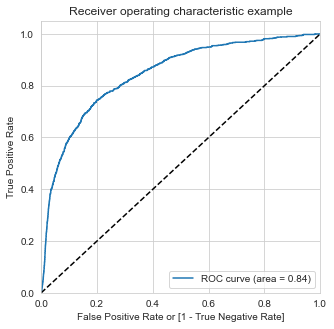

In [161]:
## ROC curve for train data

draw_roc( y_resampled_os_final.Churn,  y_resampled_os_final.Churn_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [162]:
# Let's create columns with different probability cutoffs 
cut_numbers = [float(x)/10 for x in range(10)]
for i in cut_numbers:
    y_resampled_os_final[i]=y_resampled_os_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_resampled_os_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.399846,0,0,1,1,1,1,0,0,0,0,0,0
1,0,0.821419,1,1,1,1,1,1,1,1,1,1,1,0
2,0,0.449008,2,0,1,1,1,1,1,0,0,0,0,0
3,0,0.089508,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.044223,4,0,1,0,0,0,0,0,0,0,0,0


In [163]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cut_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_resampled_os_final.Churn, y_resampled_os_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cut_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cut_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.604416  0.971938  0.236894
0.2   0.2  0.669341  0.954660  0.384021
0.3   0.3  0.713017  0.918120  0.507914
0.4   0.4  0.740248  0.862371  0.618125
0.5   0.5  0.758089  0.796909  0.719268
0.6   0.6  0.769464  0.726136  0.812792
0.7   0.7  0.745855  0.587756  0.903954
0.8   0.8  0.670414  0.372056  0.968772
0.9   0.9  0.514300  0.033428  0.995171


<Figure size 720x360 with 0 Axes>

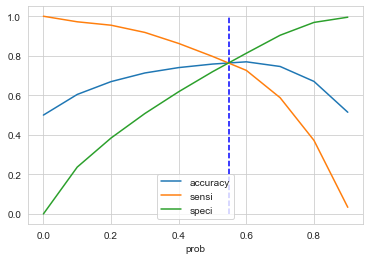

In [164]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
cut_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.55, ymax=1, ymin=0, colors="b", linestyles="--")
plt.show()

#### From the curve above, 0.55 is the optimum point to take it as a cutoff probability.

In [165]:
y_resampled_os_final['final_predicted'] =  y_resampled_os_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)
y_resampled_os_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.399846,0,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.821419,1,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.449008,2,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.089508,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.044223,4,0,1,0,0,0,0,0,0,0,0,0,0


In [166]:
##Confusion Matrix (optimal train set) 
confusion_train = metrics.confusion_matrix(y_resampled_os_final.Churn, y_resampled_os_final.final_predicted )
confusion_train

array([[14337,  4300],
       [ 4299, 14338]], dtype=int64)

In [167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_resampled_os_final.Churn, y_resampled_os_final.final_predicted)

0.7693029994097762

In [168]:
def other_mtx_logit_model(confusion):
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    sensitivity= round((TP) / (TP+FN),4) #sensitivity logistic regression model
    specificity= round((TN) / (TN+FP),4) #specificity logistic regression model   
    FPR= round((FP) / (TN+FP),4)        #False Positive Rate - predicting churn when customer does not have churned
    positive_pred_val= round((TP) / (TP+FP),4)  #Positive predictive value
    negative_pred_val= round((TN) / (TN+ FN),4) #Negative predictive value
        
    mtx_list= ['Sensitivity', 'Specificity', 'False Positive Rate','Positive Predictive Value','Negative Predictive Value']
    mtx_val = [sensitivity, specificity, FPR, positive_pred_val, negative_pred_val]
    eval_mtx_df=pd.DataFrame({'Evaluation Metrics':mtx_list, 'Value': mtx_val})
    eval_mtx_df.set_index('Evaluation Metrics', inplace= True)
    return eval_mtx_df

In [169]:
print('**Evaluation Metrics: Train Set (Optimal Cut-off)**')
print("******************************************************************")

print('Accuracy of Train Set: (Logistic Regression Model):')
print(metrics.accuracy_score(y_resampled_os_final.Churn, y_resampled_os_final.final_predicted))

print("******************************************************************")
print(classification_report(y_resampled_os_final.Churn, y_resampled_os_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")
print(other_mtx_logit_model(confusion_train))
print("******************************************************************")
print('ROC of Train Set: (Logistic Regression Model):')
print("{:2.3}".format(metrics.roc_auc_score(y_resampled_os_final.Churn, y_resampled_os_final.Churn_Prob)))

**Evaluation Metrics: Train Set (Optimal Cut-off)**
******************************************************************
Accuracy of Train Set: (Logistic Regression Model):
0.7693029994097762
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.77      0.77      0.77     18637
     Churned       0.77      0.77      0.77     18637

    accuracy                           0.77     37274
   macro avg       0.77      0.77      0.77     37274
weighted avg       0.77      0.77      0.77     37274

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.7693
Specificity                0.7693
False Positive Rate        0.2307
Positive Predictive Value  0.7693
Negative Predictive Value  0.7693
******************************************************************
ROC of Train Set: (Logistic Regression Model

#### Observation:
After finding optimal cut-off,    
(i) ROC_AUC of the train set: 0.844   
(ii) Recall Score of the train set: 0.77

### Precision and Recall Trade-off

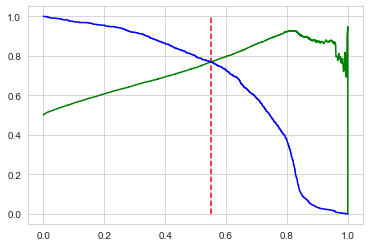

In [170]:
from sklearn.metrics import precision_recall_curve
sns.set_style('whitegrid')

p, r, thresholds = precision_recall_curve(y_resampled_os_final.Churn, y_resampled_os_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")    ##Precision: Green-Line
plt.plot(thresholds, r[:-1], "b-")   ##Recall: Red-Line
plt.vlines(x=0.55, ymax=1, ymin=0, colors='red', linestyles="--")
plt.show()

###  Making predictions and evaluation on the test set

In [171]:
##Making predictions on test data

X_resampled_os_sm_new =X_resampled_os_sm
X_resampled_os_sm_new.drop('const', axis=1, inplace=True)

#Assigning similar columns to test data as that of train set
X_test= X_test[X_resampled_os_sm_new.columns]
X_test.head()

,arpu_8,offnet_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2c_mou_8,isd_og_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2m_mou_8,total_rech_num_8,last_day_rech_amt_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,gd_ph_monthly_2g,gd_ph_sachet_3g,tenure_3_5_yr,tenure_5_12_yr
0,-0.629222,-0.676815,-0.196664,-0.209096,-0.564408,-0.232999,-0.054871,-0.318727,-0.335114,-0.594086,-0.313903,-0.279382,-0.911491,-0.669113,-0.030974,2.039507,-0.425110,-0.336289,-0.190909,2.078790,-0.227970,1,0
1,-0.929452,-0.689792,-0.196664,-0.316286,-0.581539,-0.232999,-0.054871,-0.093636,0.037655,-0.441208,-0.342948,-0.275988,-0.478431,-0.598113,-0.387194,-0.387463,-0.040046,-0.336289,-0.190909,-0.467716,1.389457,0,0
2,0.155470,-0.636450,-0.196664,-0.090872,-0.495377,-0.075860,-0.054871,-0.262568,-0.325488,-0.476028,-0.342948,-0.279382,3.419102,-0.598113,-0.387194,-0.387463,-0.425110,-0.336289,-0.190909,-0.467716,-0.227970,0,0
3,-0.483857,0.058065,-0.190812,-0.224702,-0.571641,-0.232999,-0.054871,-0.030629,-0.334611,-0.307953,-0.276210,-0.211215,0.495952,-0.669113,-0.387194,-0.387463,-0.425110,-0.336289,-0.190909,-0.467716,-0.227970,0,0
4,-0.700973,-0.699798,-0.196664,-0.337766,-0.611571,-0.231721,-0.054871,0.059316,-0.299127,0.096831,-0.264680,-0.279382,0.387687,-0.598113,-0.387194,-0.387463,2.655402,-0.336289,1.740425,-0.467716,0.311172,0,0


In [172]:
##Adding the constant to X_test (as res model is based on statsmodels)
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [173]:
##Getting the predicted values on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

0    0.307682
1    0.726491
2    0.414483
3    0.637659
4    0.152142
5    0.741013
6    0.625980
7    0.123583
8    0.412116
9    0.011962
dtype: float64

In [174]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.30768151, 0.72649144, 0.41448254, 0.63765896, 0.1521416 ,
       0.74101276, 0.62598005, 0.12358267, 0.41211631, 0.01196173])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [175]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.307682,0
1,0,0.726491,1
2,0,0.414483,2
3,1,0.637659,3
4,0,0.152142,4


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.55 (optimal cut-off) else 0

In [176]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)  ##optimal cut-off is 0.55
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.307682,0,0
1,0,0.726491,1,1
2,0,0.414483,2,0
3,1,0.637659,3,1
4,0,0.152142,4,0


In [177]:
##Confusion Matrix (optimal test set) 
confusion_test = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
confusion_test

array([[6163, 1822],
       [ 104,  359]], dtype=int64)

In [178]:
print('**Evaluation Metrics: Test Set (Optimal Cut-off)**')
print("******************************************************************")

print('Accuracy of Test Set: (Logistic Regression Model):')
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

print("******************************************************************")
print(classification_report(y_test_pred_final.Churn, y_test_pred_final.predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")
print(other_mtx_logit_model(confusion_test))
print("******************************************************************")
print('ROC of Test Set: (Logistic Regression Model):')
print("{:2.3}".format(metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)))

**Evaluation Metrics: Test Set (Optimal Cut-off)**
******************************************************************
Accuracy of Test Set: (Logistic Regression Model):
0.7720170454545454
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.98      0.77      0.86      7985
     Churned       0.16      0.78      0.27       463

    accuracy                           0.77      8448
   macro avg       0.57      0.77      0.57      8448
weighted avg       0.94      0.77      0.83      8448

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.7754
Specificity                0.7718
False Positive Rate        0.2282
Positive Predictive Value  0.1646
Negative Predictive Value  0.9834
******************************************************************
ROC of Test Set: (Logistic Regression Model):


Observation:
Using the optimal cut-off,    
(i) ROC_AUC of test set: 0.848   
(ii) Recall Score of test set: 0.78.

### Top 15 Features:

In [179]:
res.params.sort_values(ascending=False)[0:15]

roam_og_mou_8          0.328565
arpu_8                 0.182669
gd_ph_sachet_3g        0.177882
loc_og_t2c_mou_8       0.173565
isd_og_mou_8          -0.111303
gd_ph_monthly_2g      -0.138309
vol_3g_mb_8           -0.138992
offnet_mou_8          -0.146042
spl_og_mou_8          -0.163630
std_ic_t2m_mou_8      -0.189956
loc_og_t2t_mou_8      -0.223685
sachet_3g_8           -0.281534
loc_og_t2m_mou_8      -0.296664
loc_ic_t2f_mou_8      -0.397436
last_day_rech_amt_8   -0.400200
dtype: float64

### *Model summary*

#### Train set     
Accuracy =  0.77    
Sensitivity/Recall = 0.77     
Specificity = 0.77 
 

#### Test set      
Accuracy = 0.77   
Sensitivity/Recall= 0.77   
Specificity =  0.77  
 